This project includes evaluating machine learning models on the Wine Quality dataset, showcasing their accuracy and comparing them to determine which model performs best.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from ml_utils import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:

dtf = pd.read_csv(r"D:\My folder\ostad\module_17\wine+quality\winequality-white.csv")

print(dtf)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

Shape: (4898, 12)
-----------------
fixed acidity --> Type:num | Nas: 0(0%) | Min-Max: (3)-(14)
volatile acidity --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
citric acid --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
residual sugar --> Type:num | Nas: 0(0%) | Min-Max: (0)-(65)
chlorides --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
free sulfur dioxide --> Type:num | Nas: 0(0%) | Min-Max: (2)-(289)
total sulfur dioxide --> Type:num | Nas: 0(0%) | Min-Max: (9)-(440)
density --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
pH --> Type:num | Nas: 0(0%) | Min-Max: (2)-(3)
sulphates --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
alcohol --> Type:num | Nas: 0(0%) | Min-Max: (8)-(14)
quality --> Type:cat | Nas: 0(0%) | Categories: 7


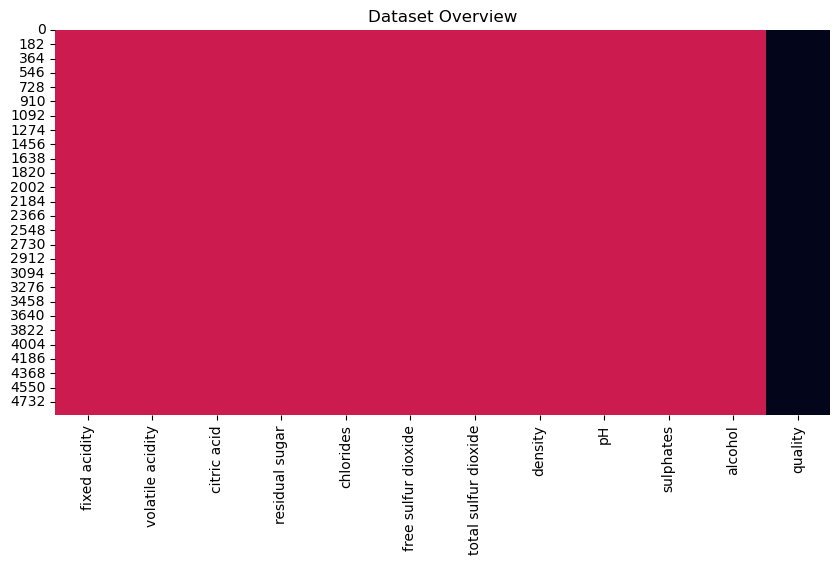

 Categerocial   Numerical/DateTime   NaN 


In [3]:
dtf_overview(dtf, max_cat=20, figsize=(10,5))

In [4]:
# summarize the data

# shape
print(dtf.shape)
# head
display(dtf.head(5))
# descriptions
display(dtf.describe())
# class distribution
display(dtf.groupby('quality').size())

(4898, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

Data Visulization

In [5]:
features = []

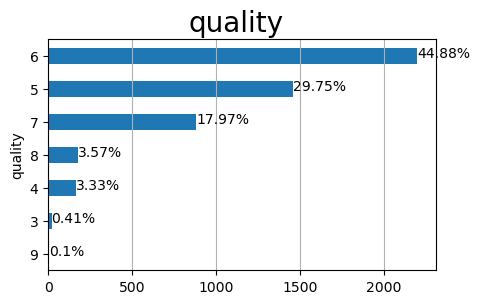

In [6]:
freqdist_plot(dtf, "quality", figsize=(5,3))

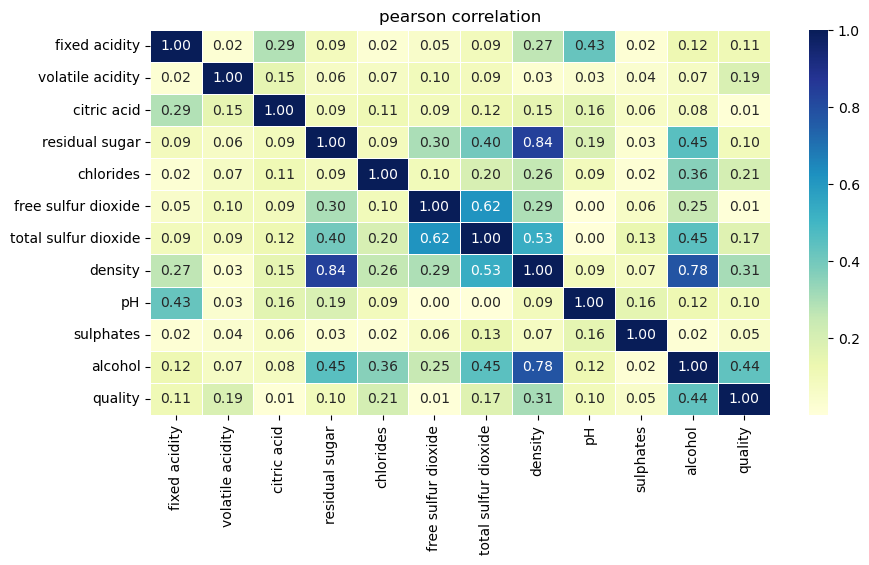

In [7]:
corr = corr_matrix(dtf, negative=False)

In [8]:
print(dtf.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


# Left Plot: Density Plot

Most wines with different quality scores are centered around a fixed acidity of 7–8.

# Middle Plot: Stacked Histogram by Bins
This is a binned plot of fixed acidity, showing the relative proportions of wine qualities in each acidity range.

X-axis: bins of fixed acidity (e.g., 3.8–5.9, 5.9–6.2, etc.)

Y-axis: proportion (from 0 to 1) of wine samples in each quality level within that bin.

Each color = a quality class (e.g., red = quality 5, green = 6, purple = 7)

# Right Plot: Outliers
This plot is empty, suggesting there are no extreme outliers in fixed acidity for the dataset, or they were not detected under the method used.



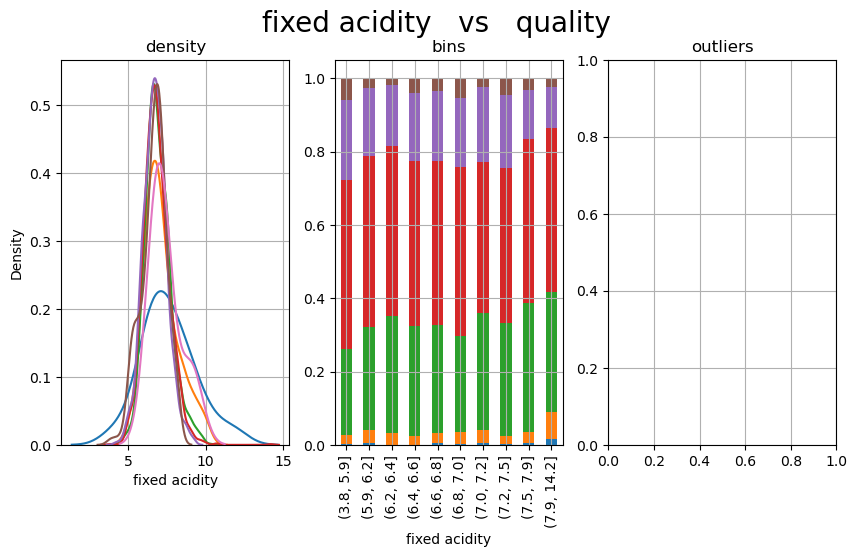

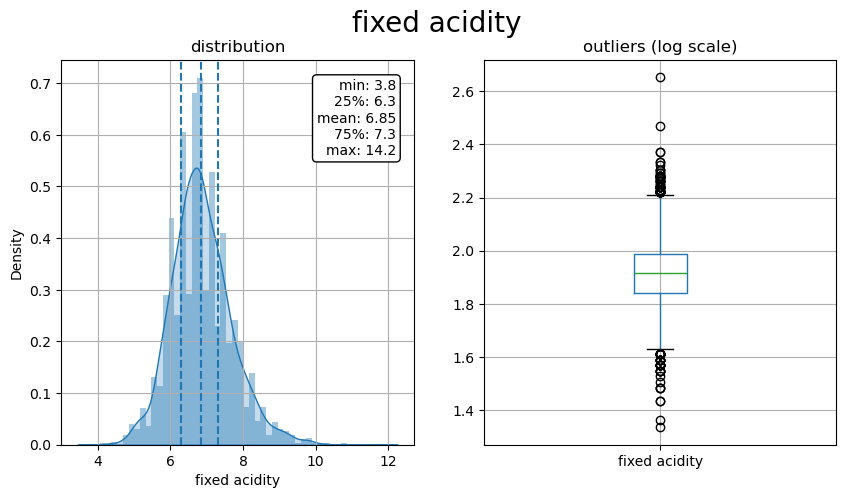

In [9]:
bivariate_plot(dtf, x="fixed acidity", y="quality", figsize=(10,5))
freqdist_plot(dtf, "fixed acidity", box_logscale=True, figsize=(10,5))
features.append("fixed acidity")

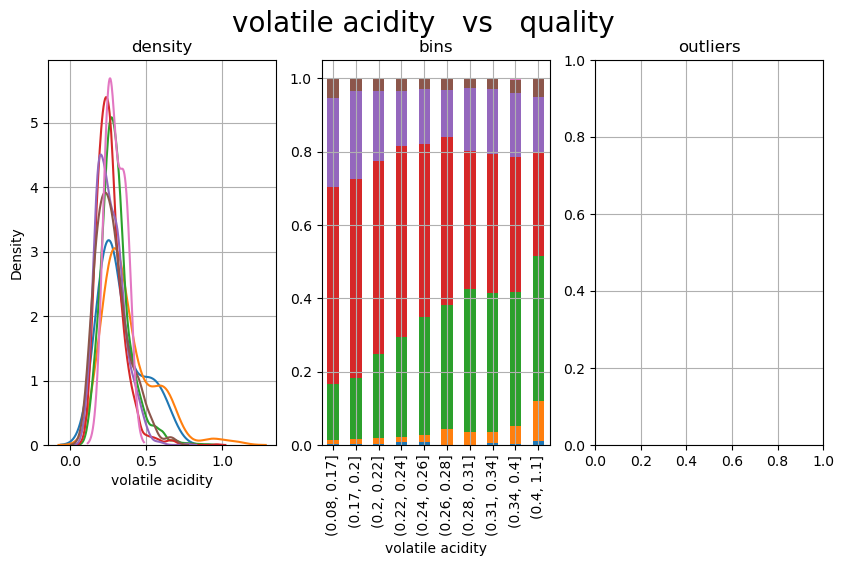

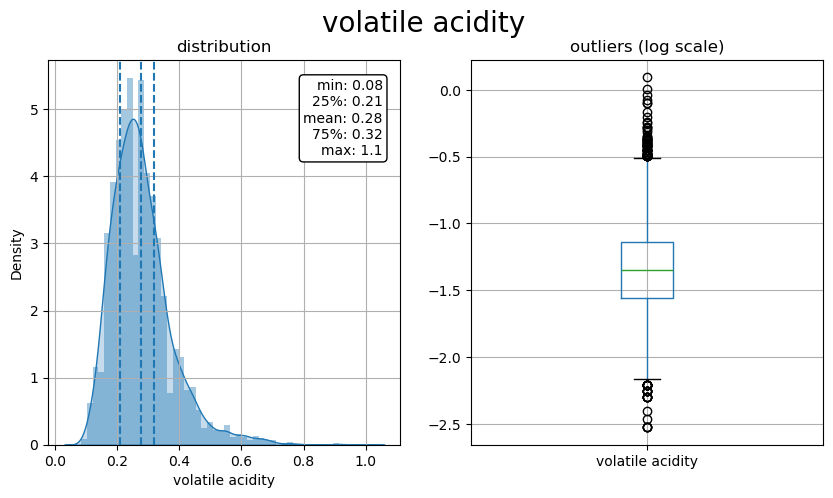

In [10]:
bivariate_plot(dtf, x="volatile acidity", y="quality", figsize=(10,5))
freqdist_plot(dtf, "volatile acidity", box_logscale=True, figsize=(10,5))
features.append("volatile acidity")

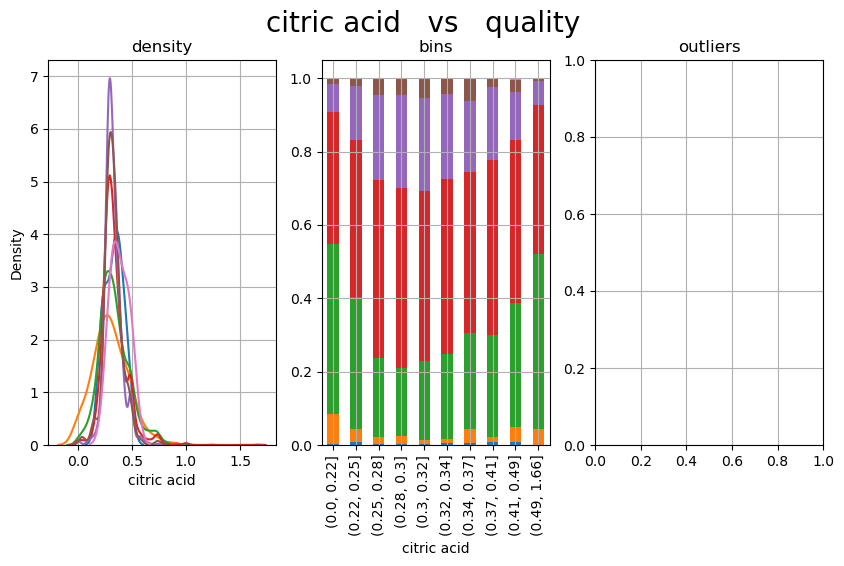

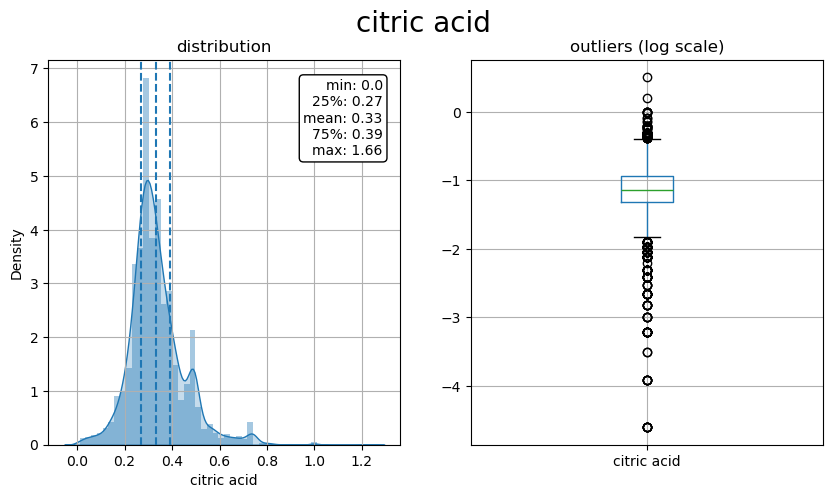

In [11]:
bivariate_plot(dtf, x="citric acid", y="quality", figsize=(10,5))
freqdist_plot(dtf, "citric acid", box_logscale=True, figsize=(10,5))
features.append("citric acid")


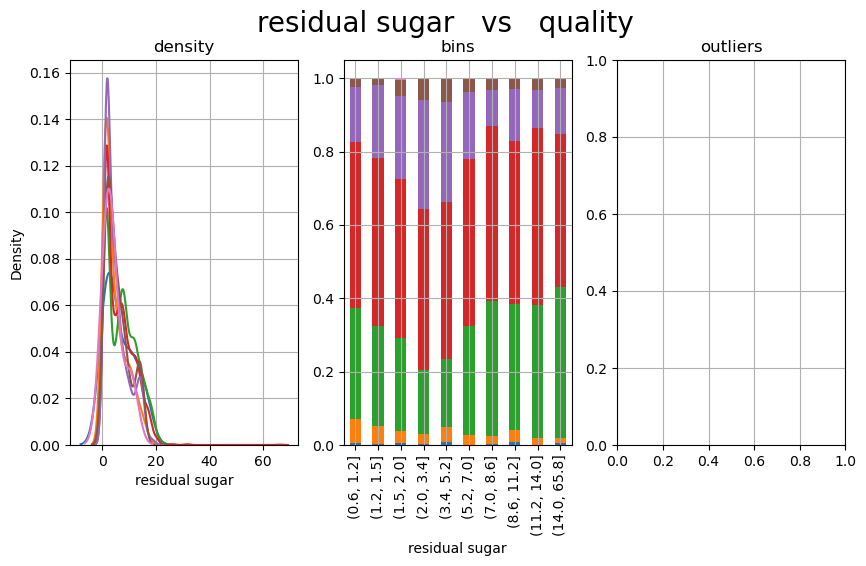

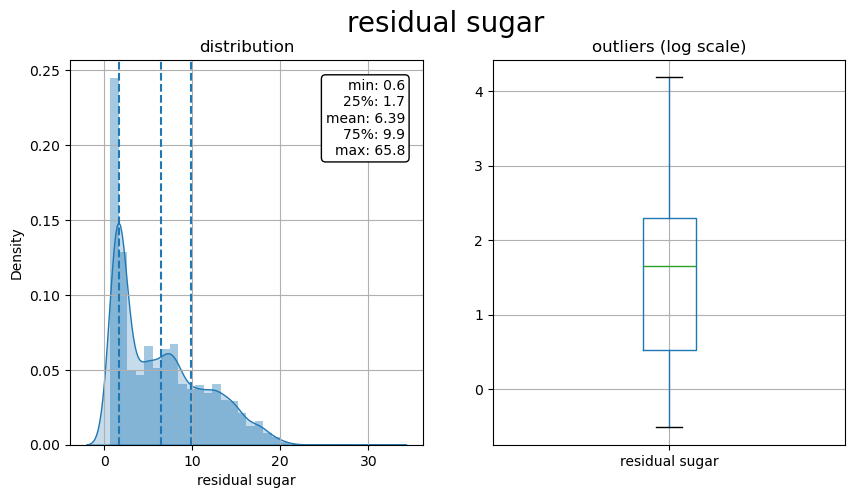

In [12]:
bivariate_plot(dtf, x="residual sugar", y="quality", figsize=(10,5))
freqdist_plot(dtf, "residual sugar", box_logscale=True, figsize=(10,5))
features.append("residual sugar")

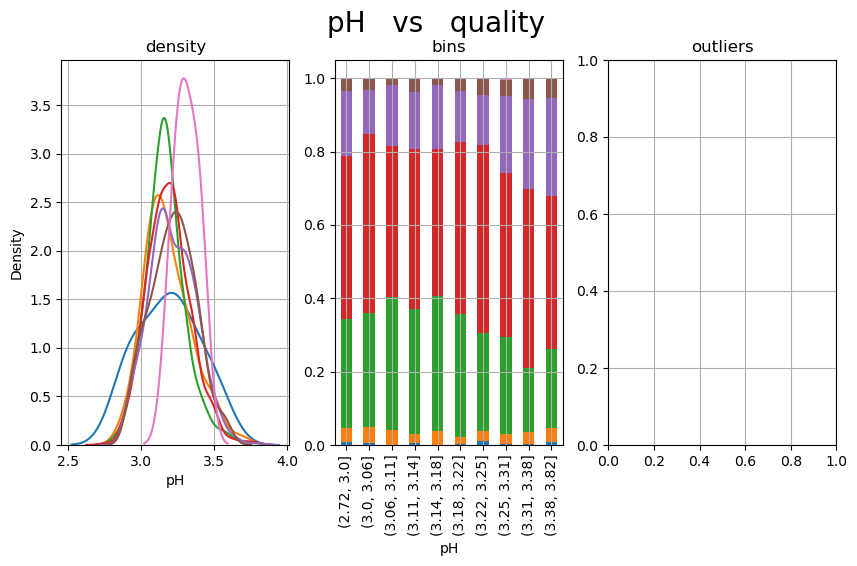

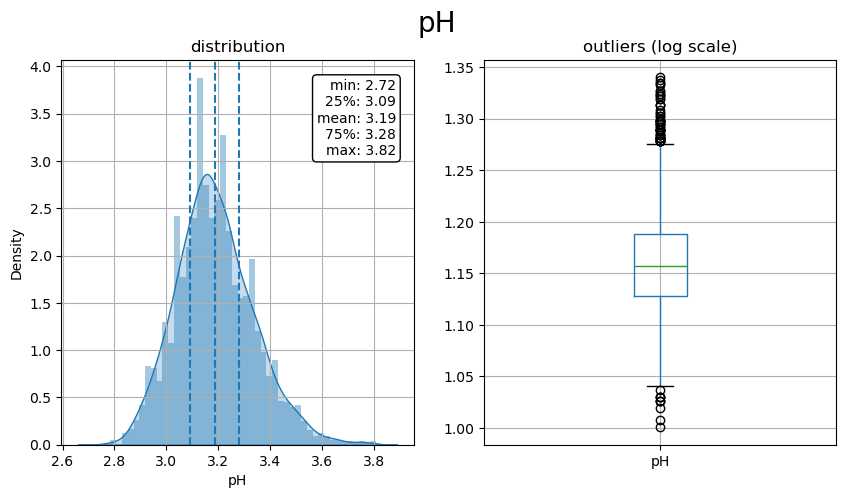

In [13]:
bivariate_plot(dtf, x="pH", y="quality", figsize=(10,5))
freqdist_plot(dtf, "pH", box_logscale=True, figsize=(10,5))
features.append("pH")

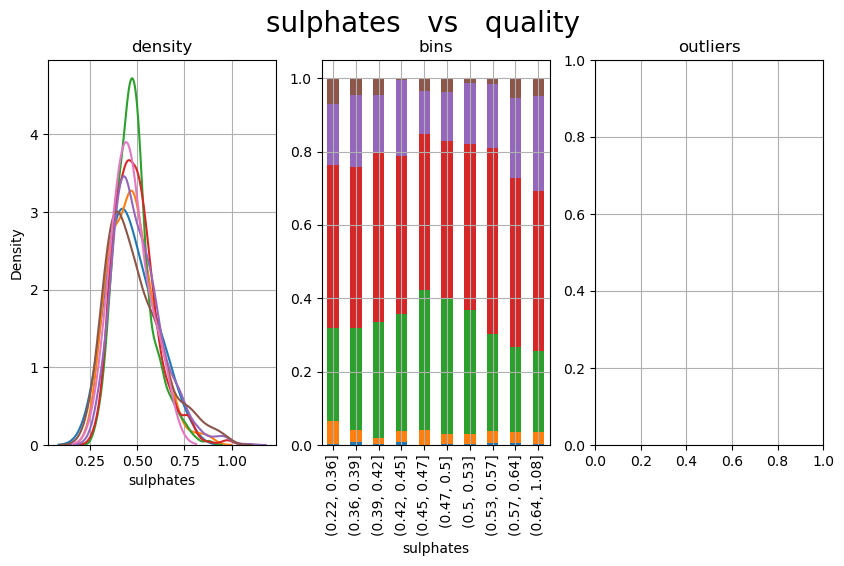

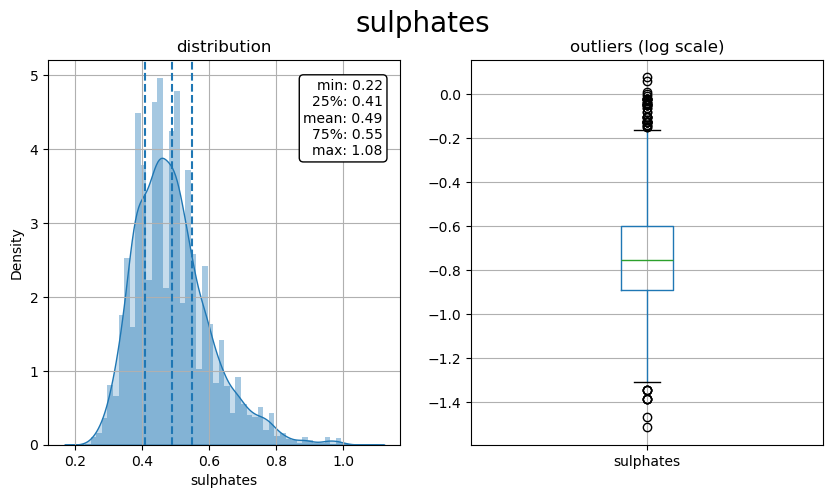

In [14]:
bivariate_plot(dtf, x="sulphates", y="quality", figsize=(10,5))
freqdist_plot(dtf, "sulphates", box_logscale=True, figsize=(10,5))
features.append("sulphates")

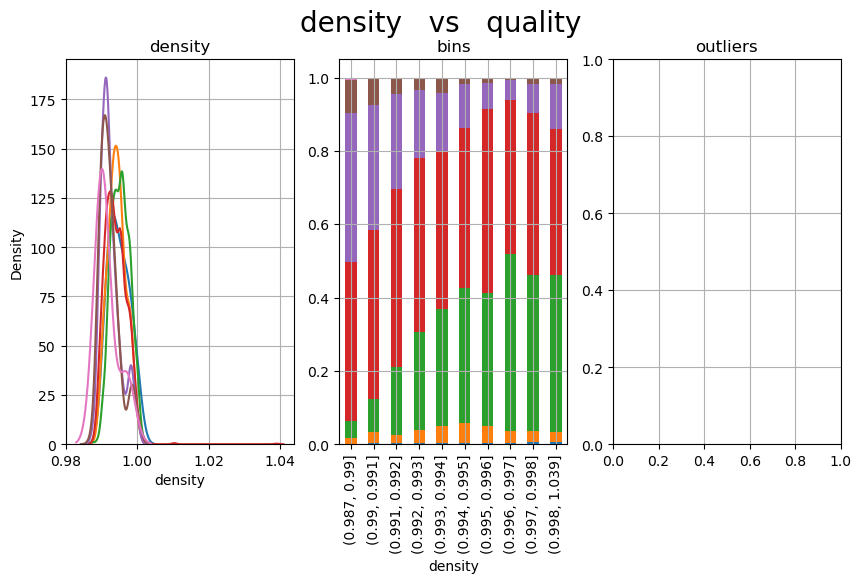

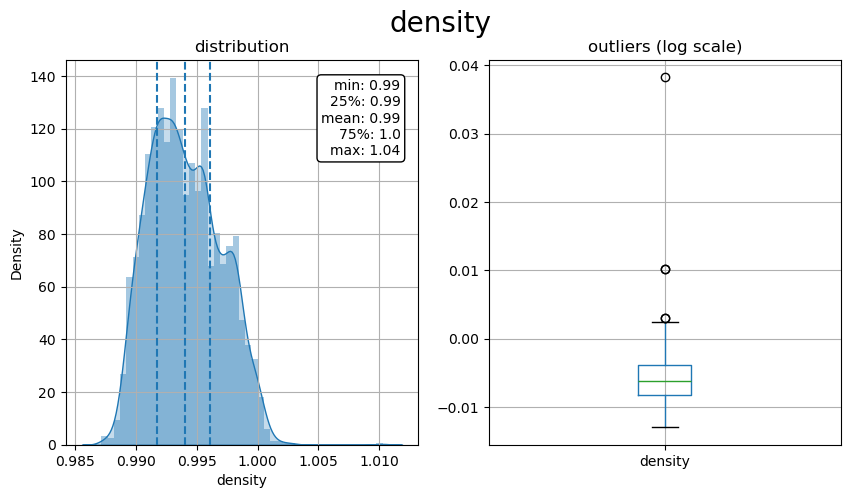

In [15]:
bivariate_plot(dtf, x="density", y="quality", figsize=(10,5))
freqdist_plot(dtf, "density", box_logscale=True, figsize=(10,5))
features.append("density")


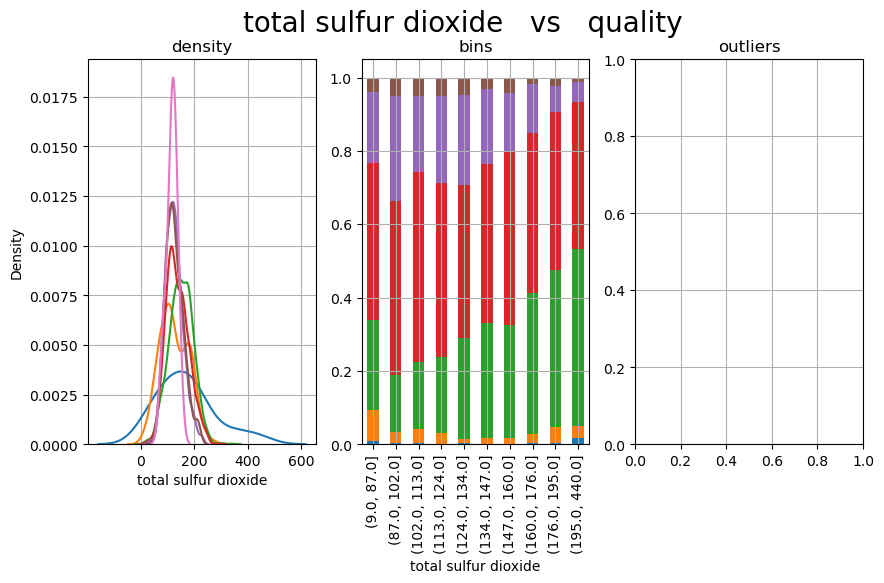

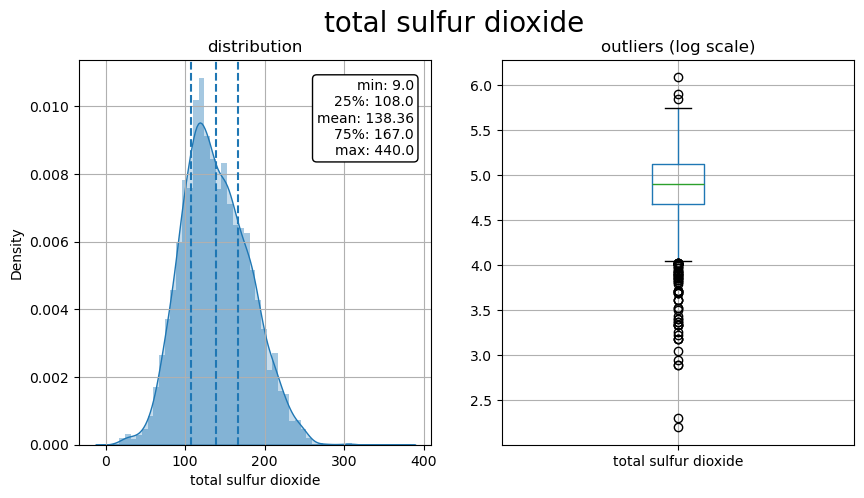

In [16]:
bivariate_plot(dtf, x="total sulfur dioxide", y="quality", figsize=(10,5))
freqdist_plot(dtf, "total sulfur dioxide", box_logscale=True, figsize=(10,5))
features.append("total sulfur dioxide")

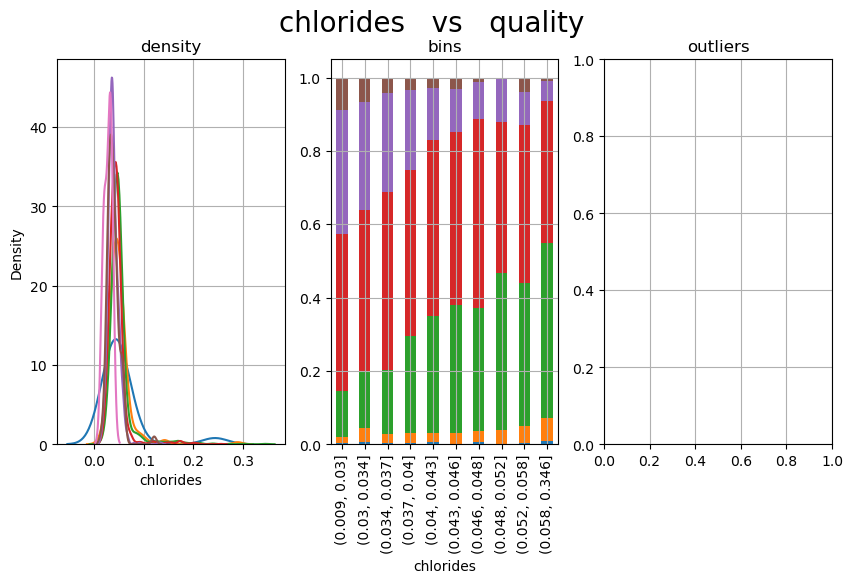

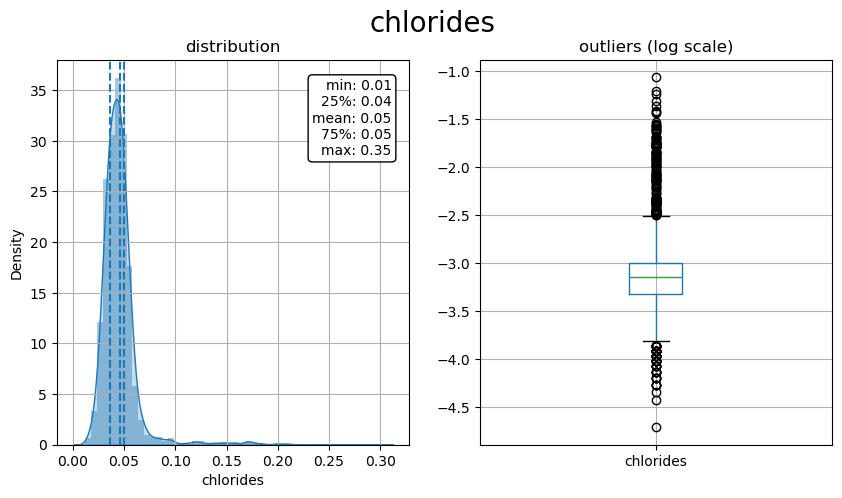

In [17]:
bivariate_plot(dtf, x="chlorides", y="quality", figsize=(10,5))
freqdist_plot(dtf, "chlorides", box_logscale=True, figsize=(10,5))
features.append("chlorides")

Higher alcohol content may correlate with better quality.

The distribution is right-skewed, with most wines clustered around 10–12% alcohol.

Outliers could be errors or rare varieties.

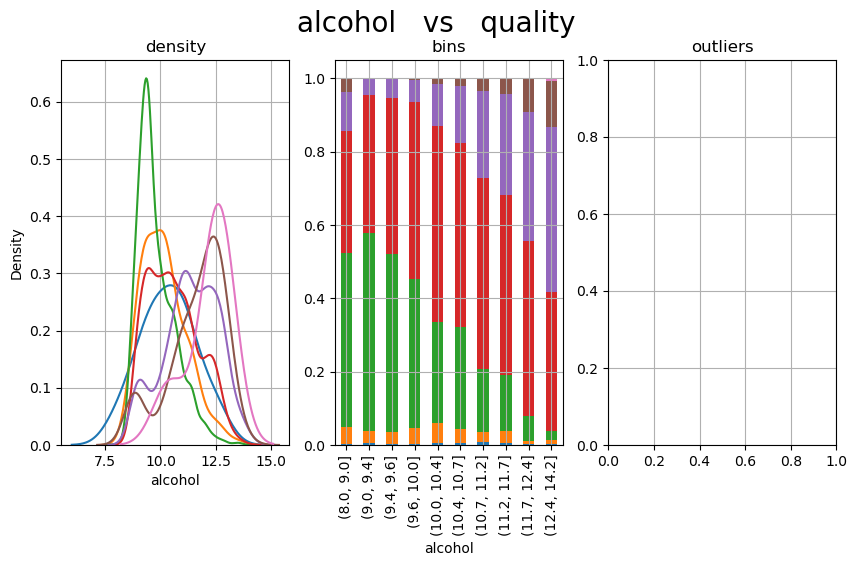

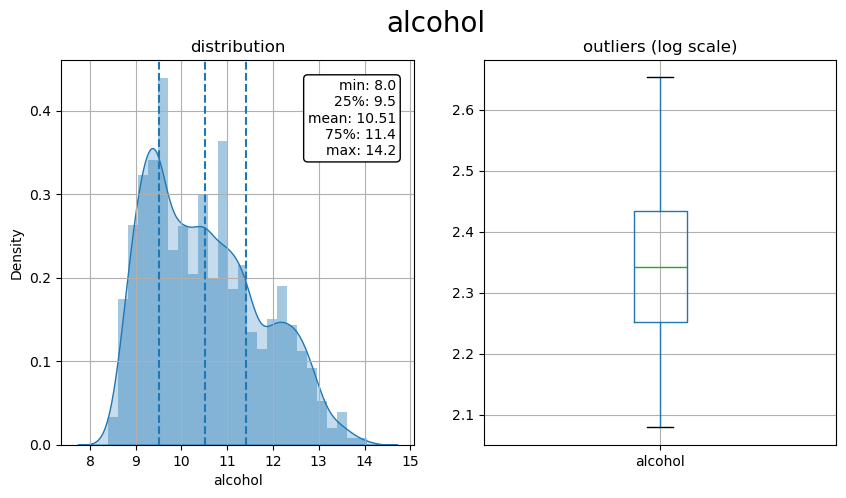

In [18]:

bivariate_plot(dtf, x="alcohol", y="quality", figsize=(10,5))
freqdist_plot(dtf, "alcohol", box_logscale=True, figsize=(10,5))
features.append("alcohol")

# 1. Alcohol Histogram with Quality

Higher-quality wines (e.g., 7–9) tend to cluster at higher alcohol levels (peaks around 11–13%).

Lower-quality wines (3–5) are more common at lower alcohol levels (8–10%).

Suggests a positive correlation between alcohol content and perceived quality.

# 2. Citric Acid Histogram with Quality

Wines with moderate citric acid (~0.25–0.75 g/L) are associated with higher quality (6–9).

Very low (<0.25) or very high (>1.0) citric acid levels correlate with lower quality (3–5).

Citric acid (a preservative and flavor enhancer) may have an optimal range for quality.

# 3. Density Histogram with Quality

Higher-quality wines (7–9) cluster at lower densities (~0.99–1.00), likely due to higher alcohol (less dense).

Lower-quality wines (3–5) skew toward higher densities (~1.01–1.04), possibly from residual sugars or other solids.

Density and alcohol are often inversely related in wine chemistry.

## Potential Insights for Winemaking:
Boost alcohol content (within legal/consumer limits) to enhance quality.

Manage citric acid carefully—avoid extremes.

Monitor density as a proxy for alcohol/sugar balance.

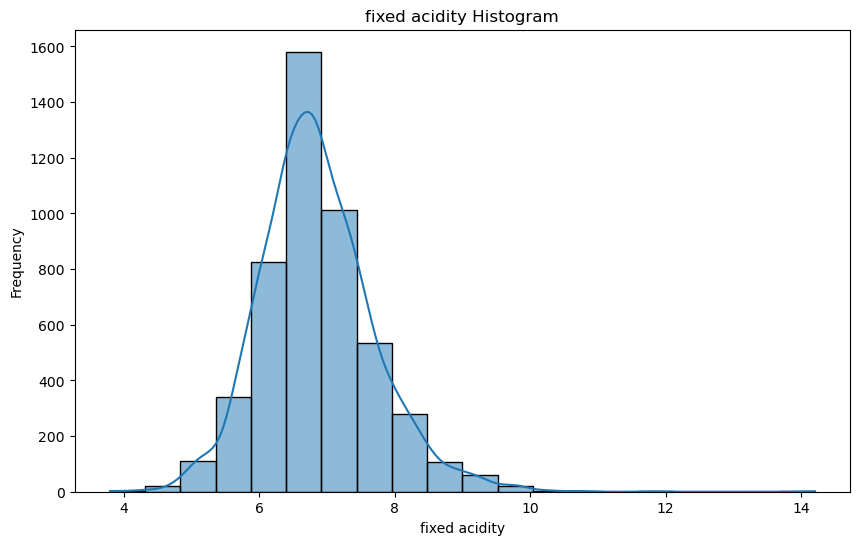

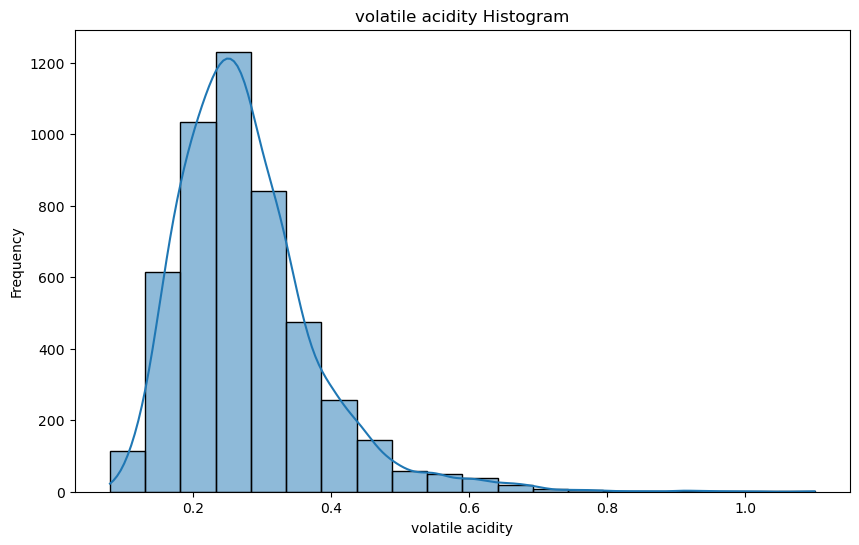

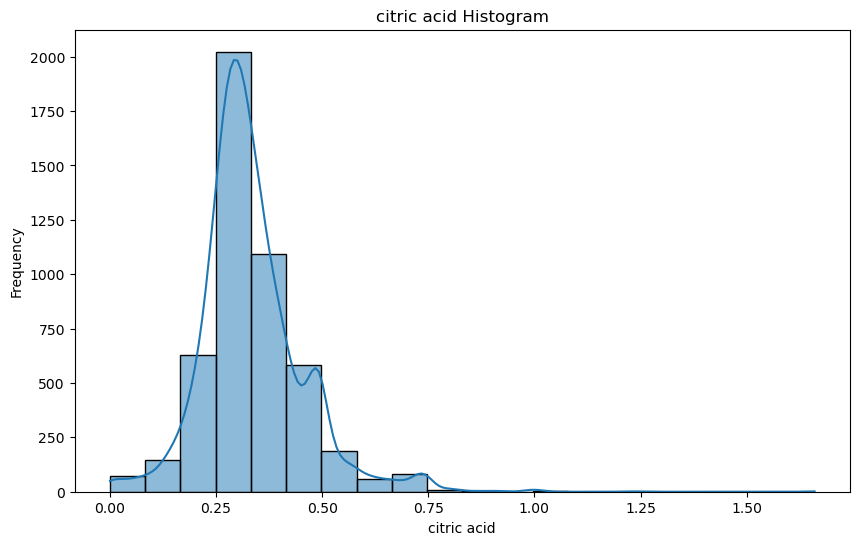

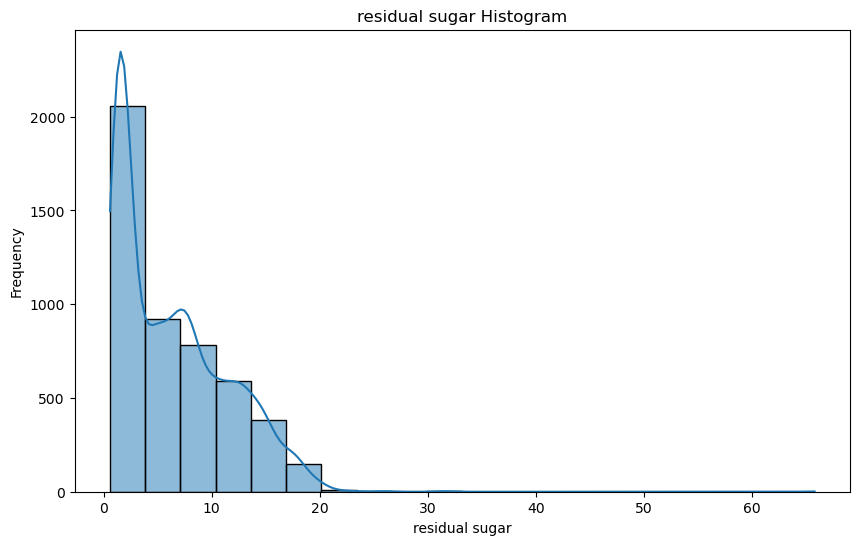

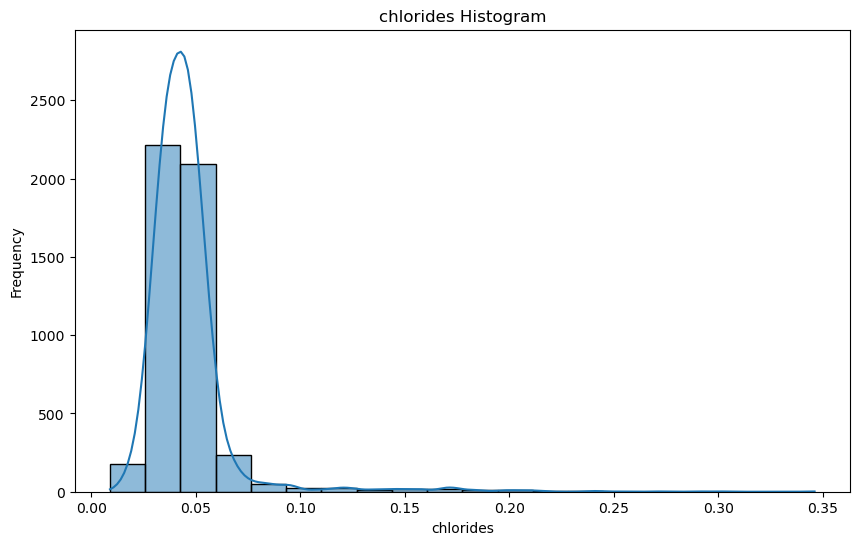

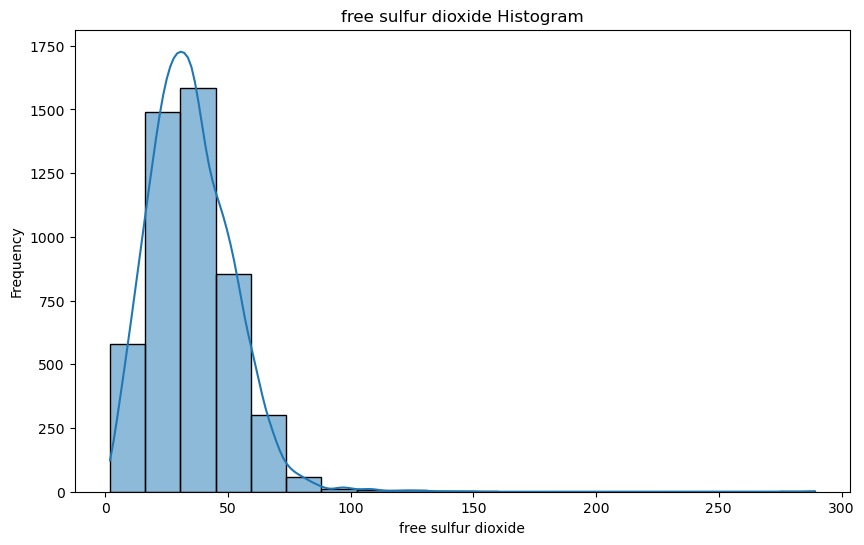

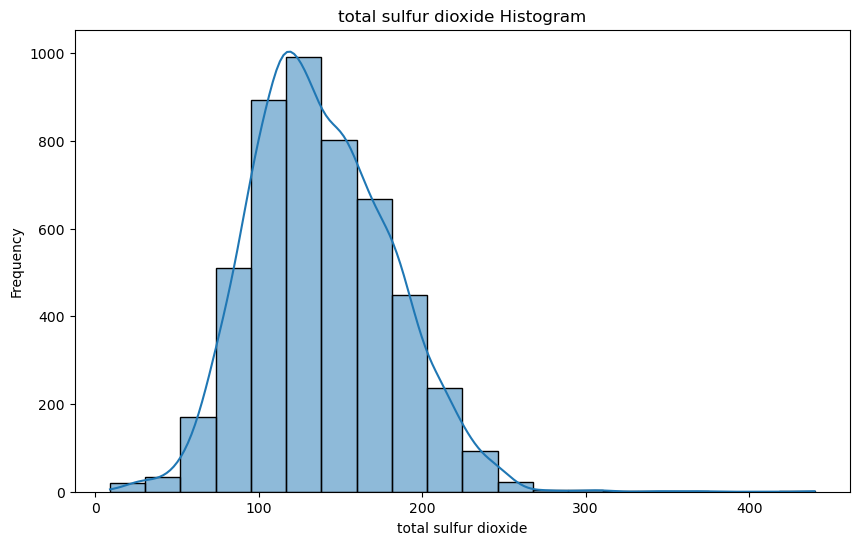

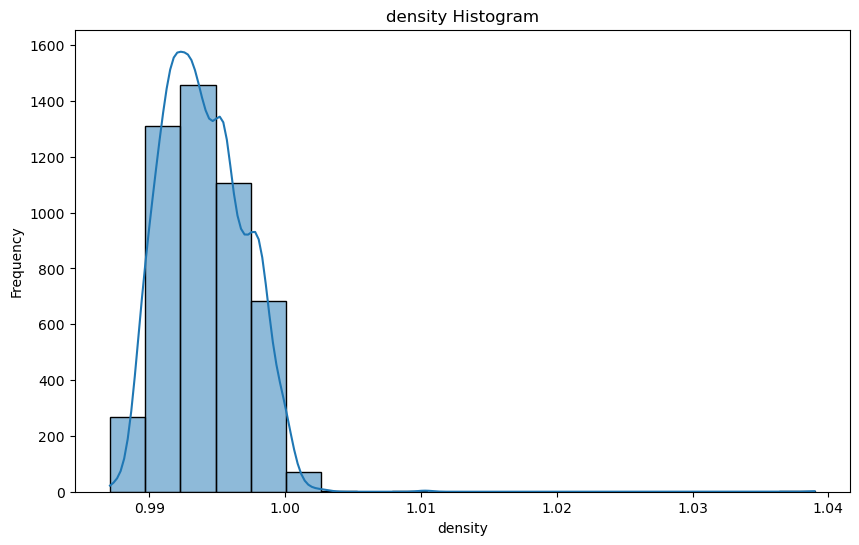

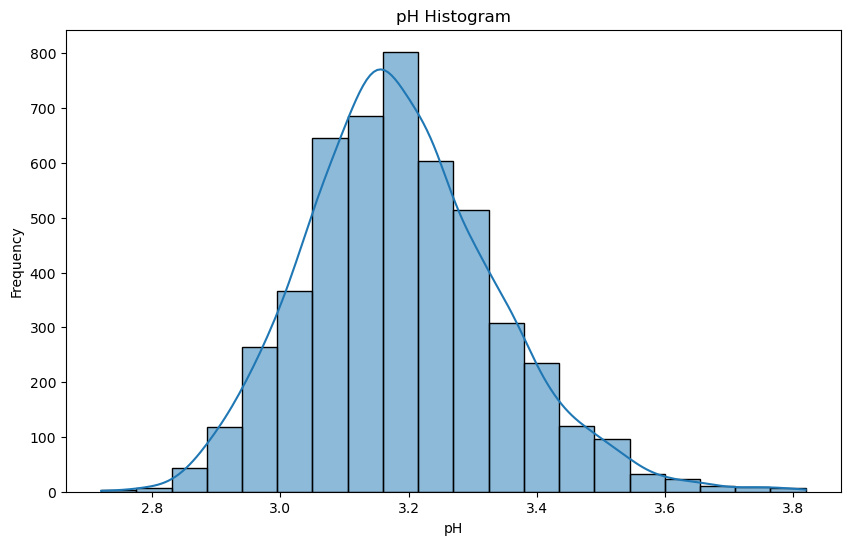

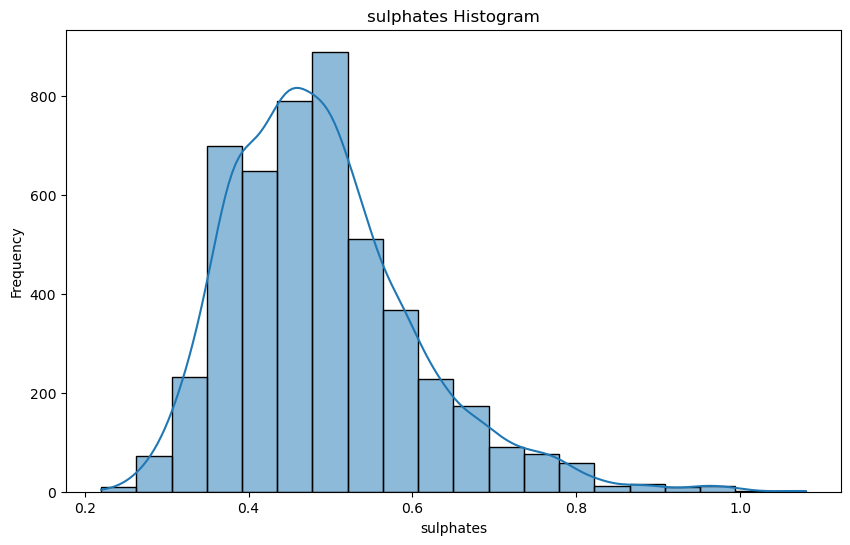

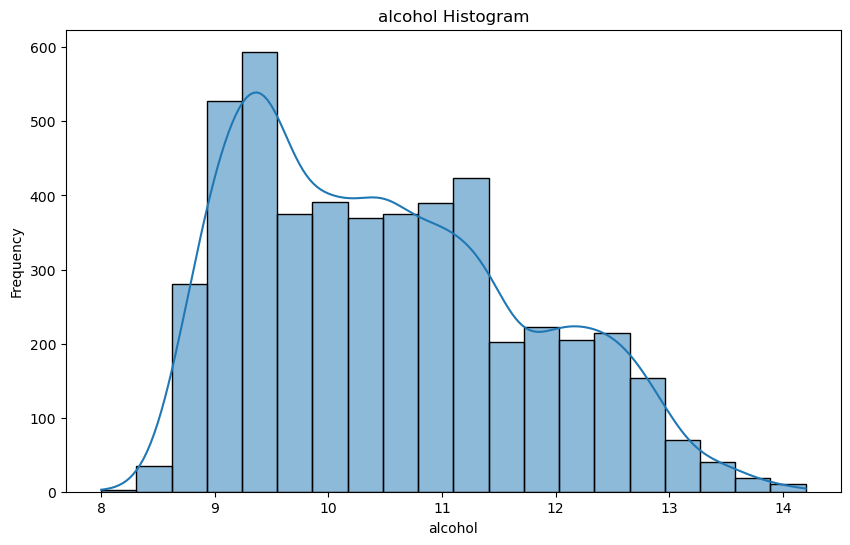

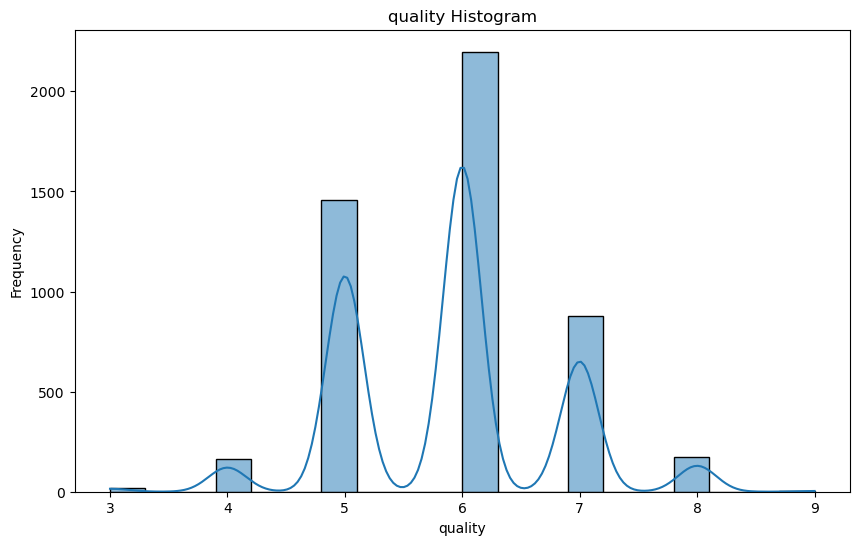

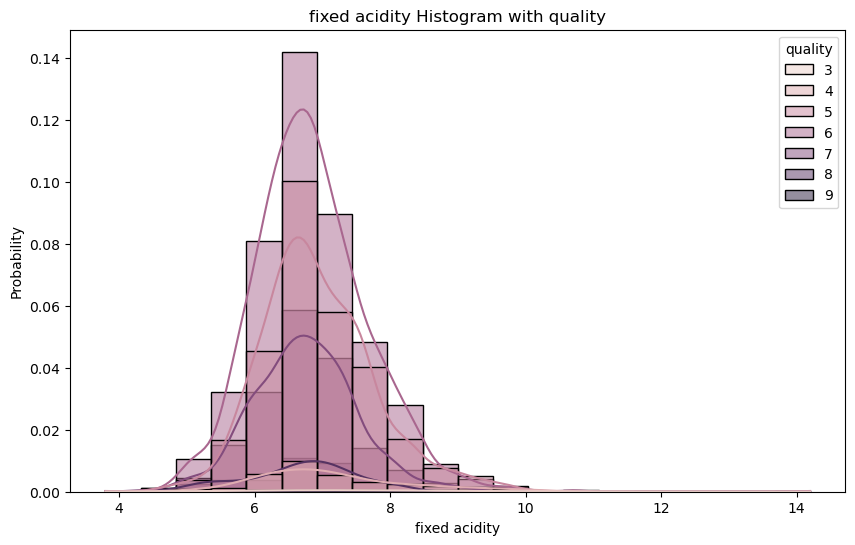

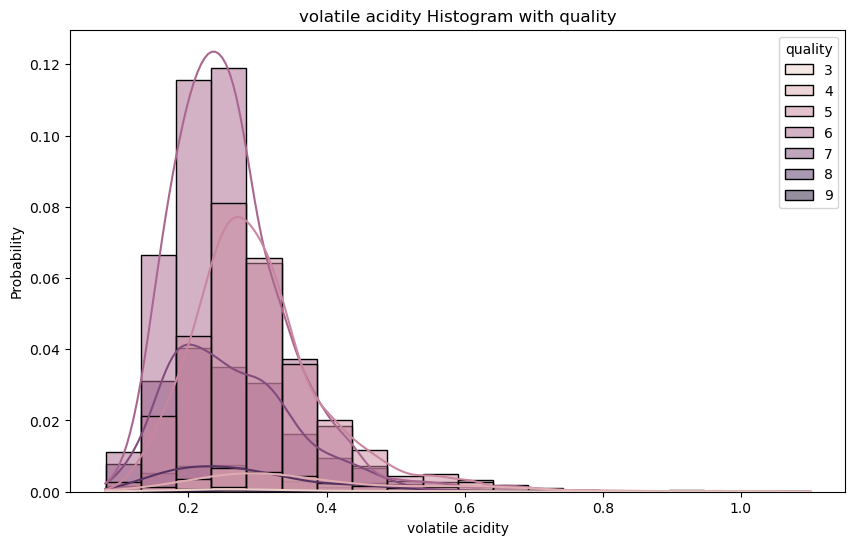

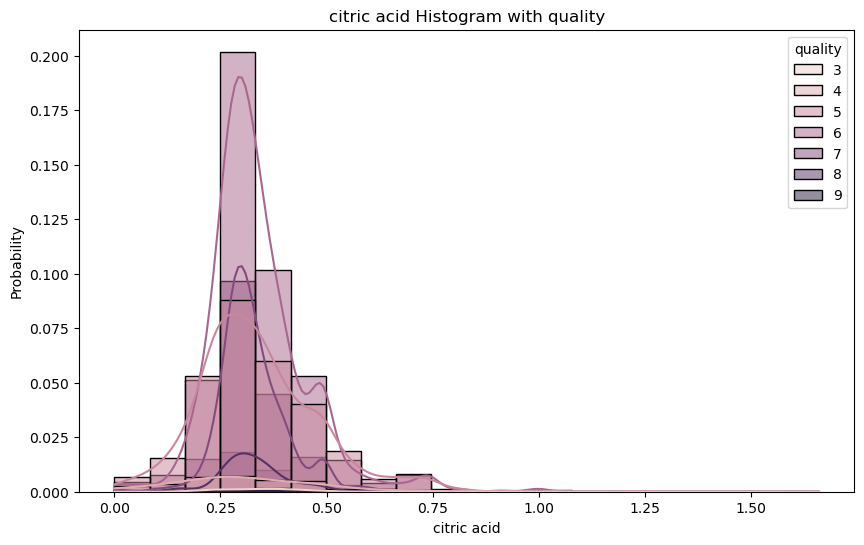

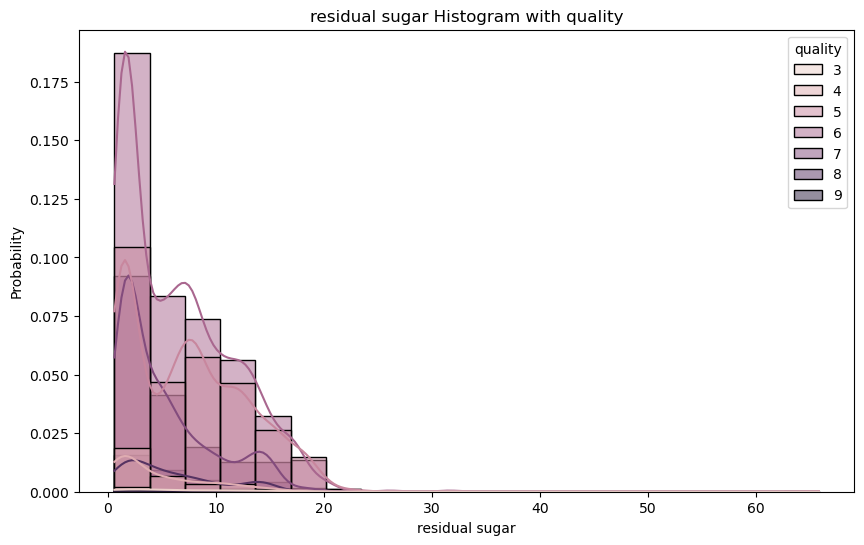

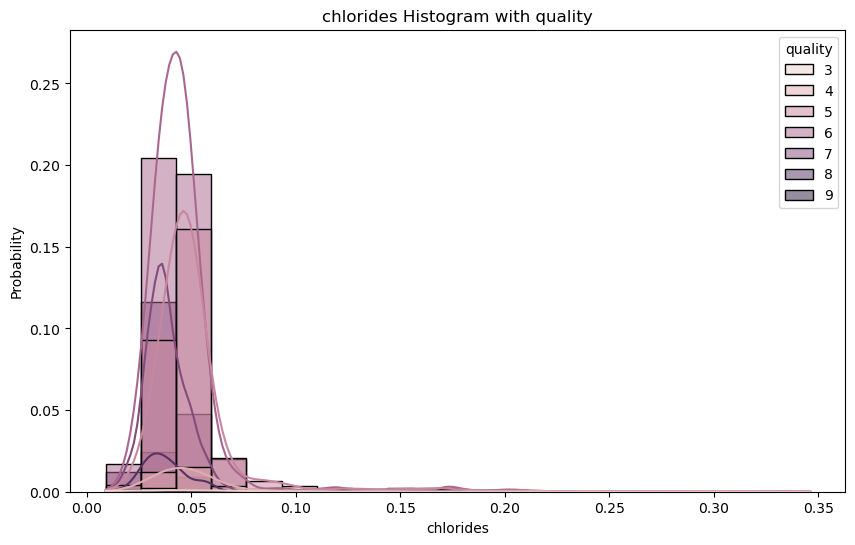

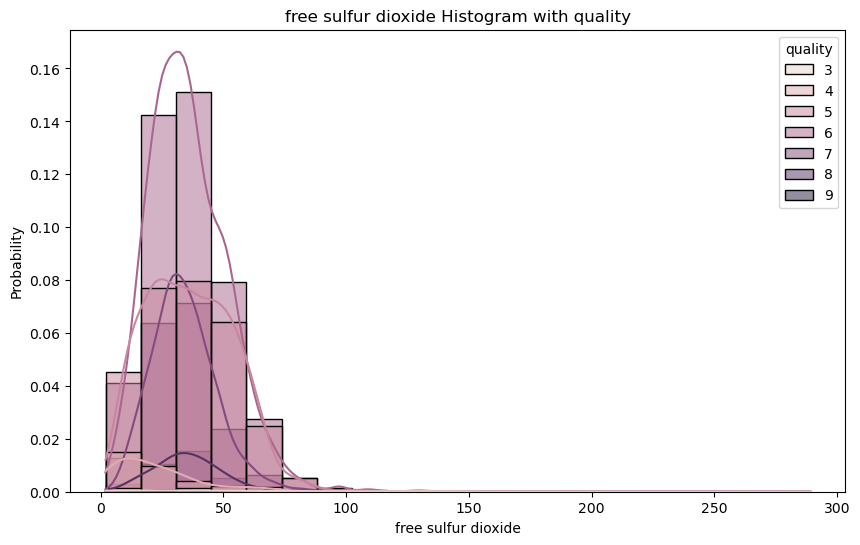

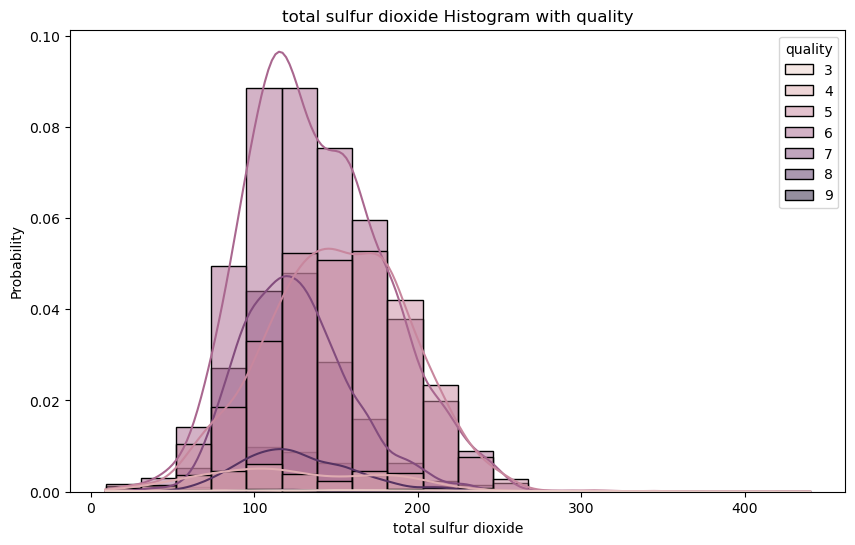

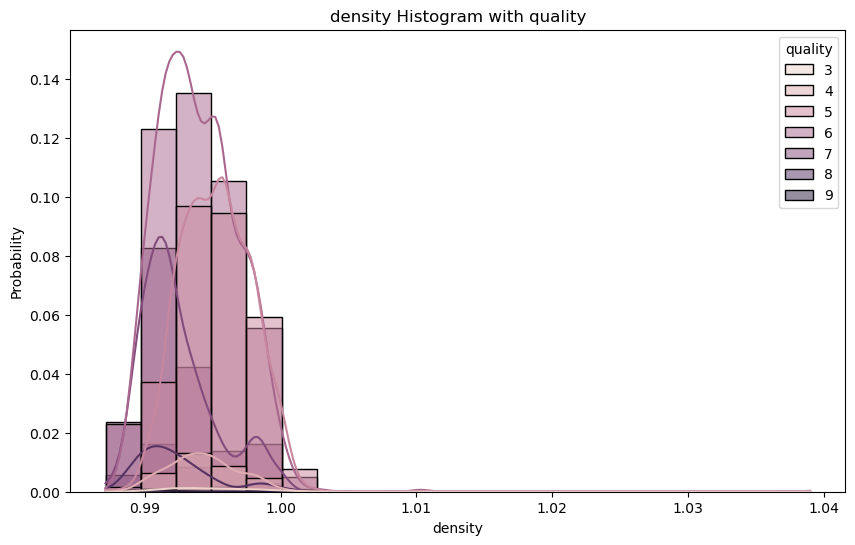

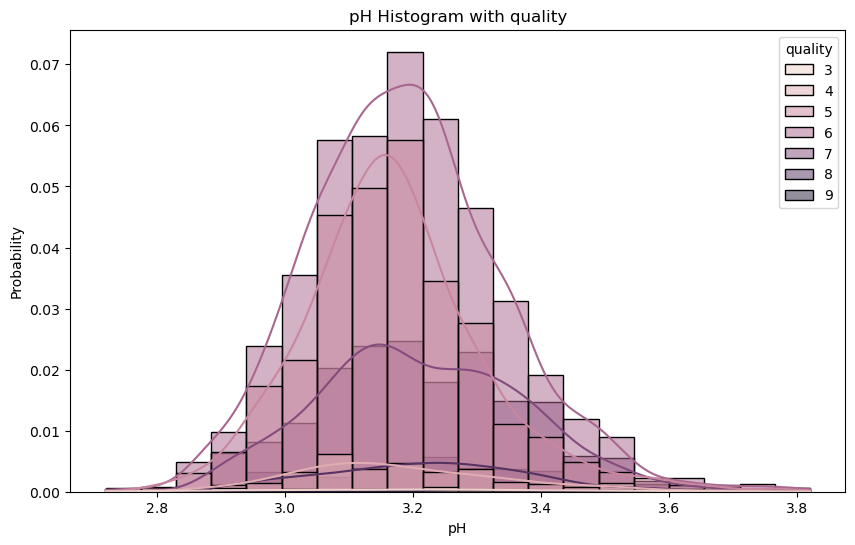

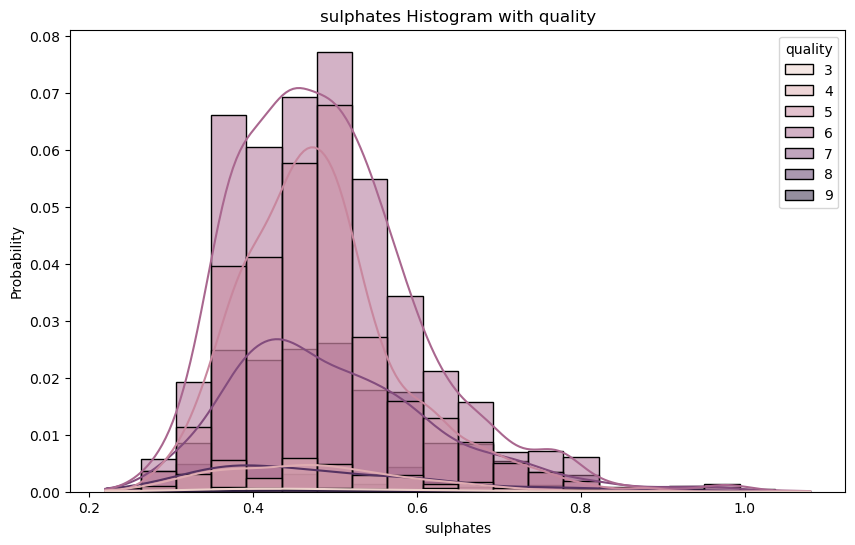

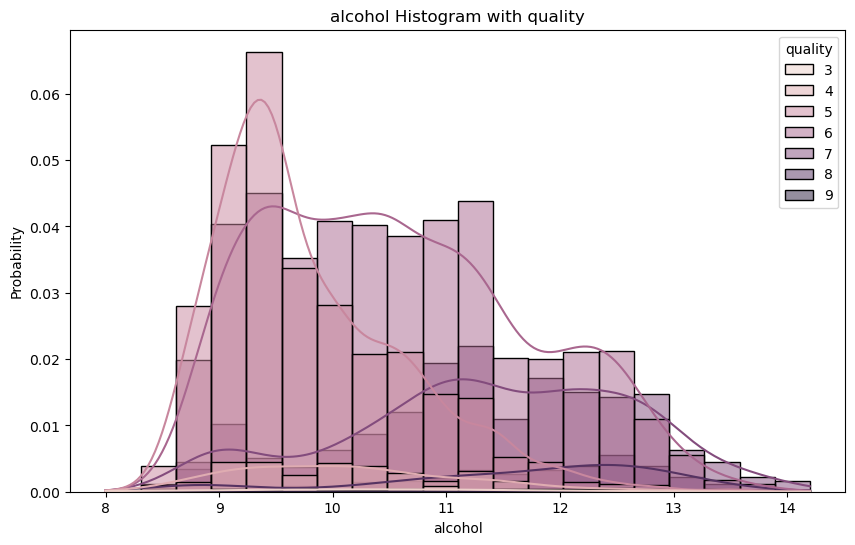

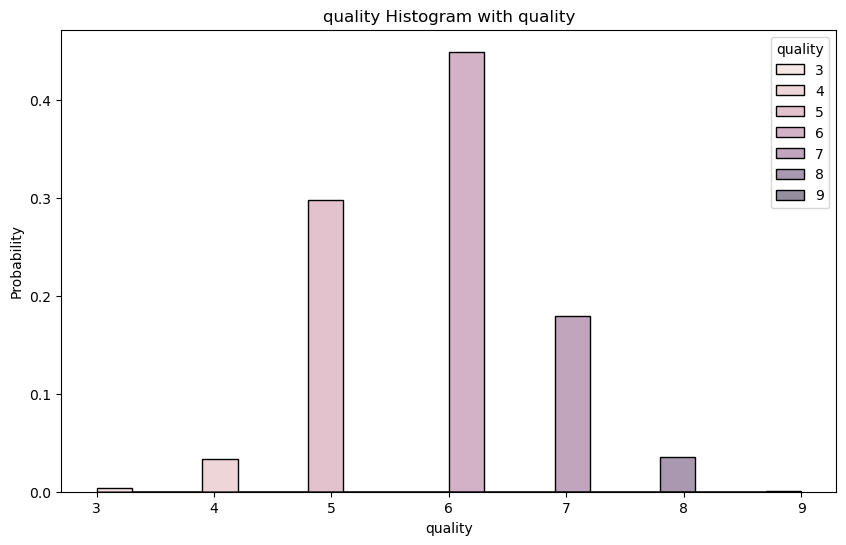

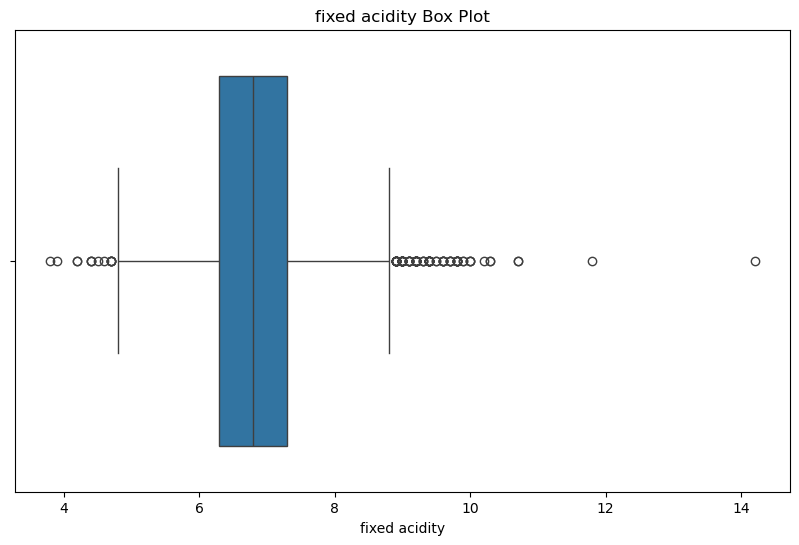

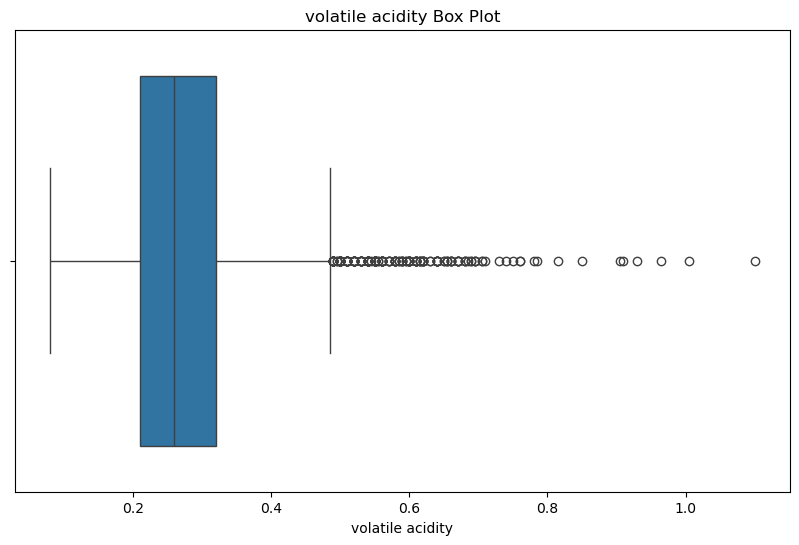

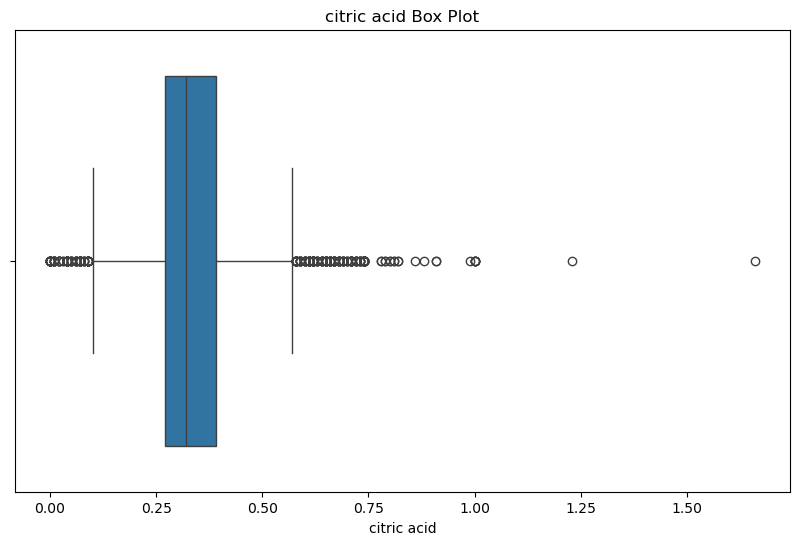

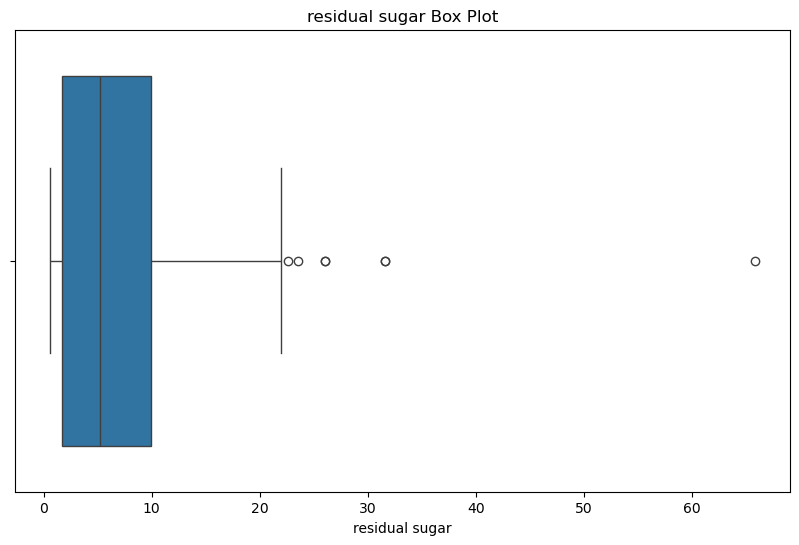

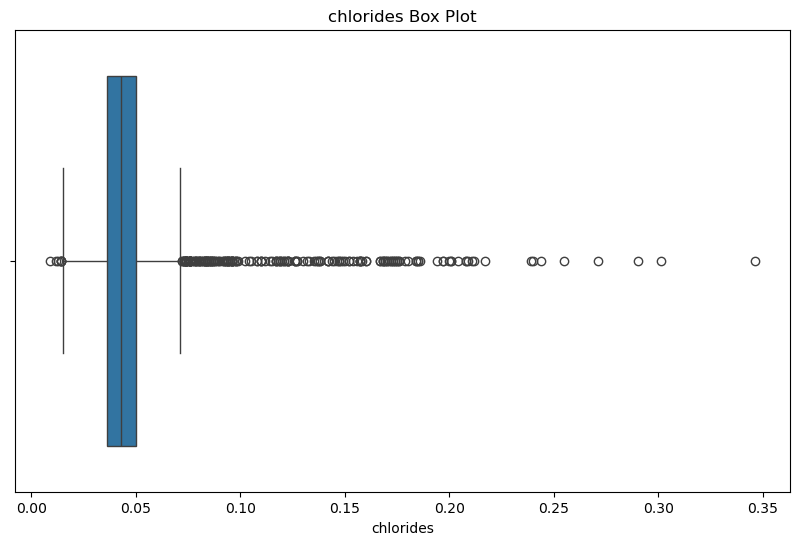

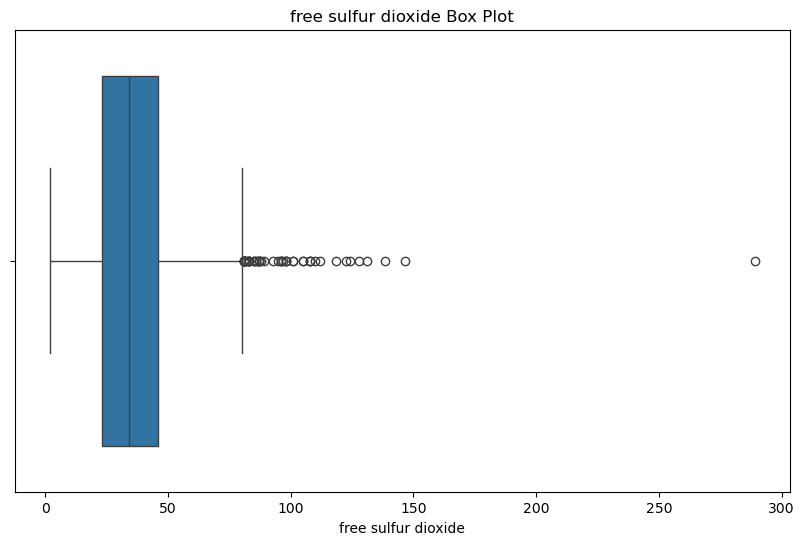

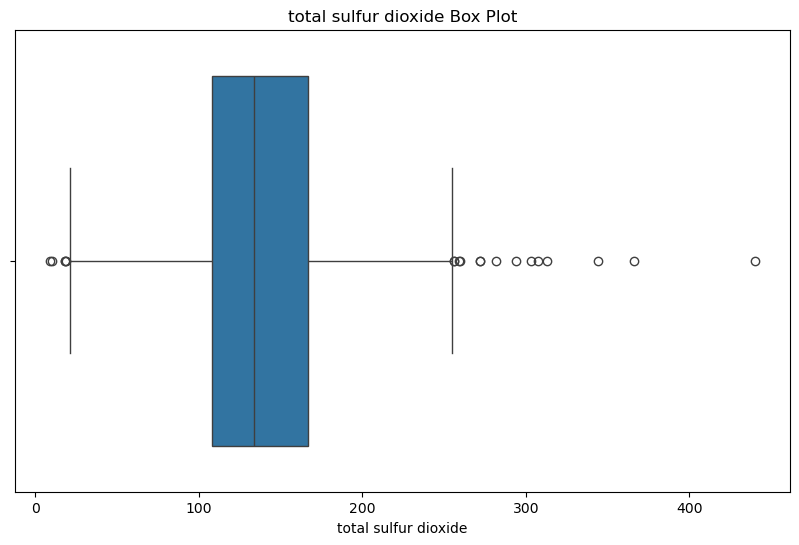

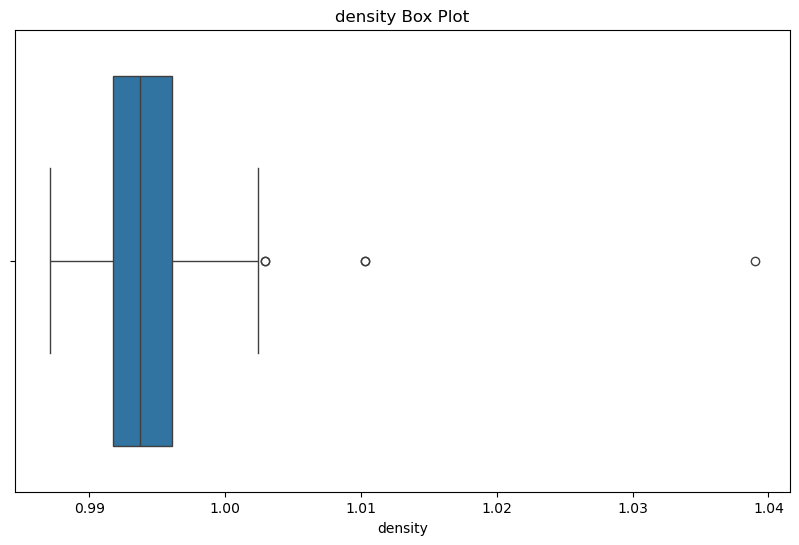

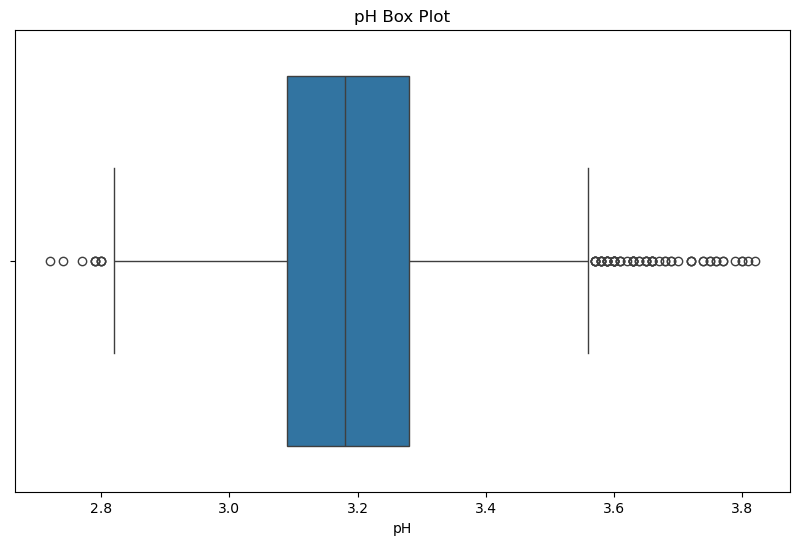

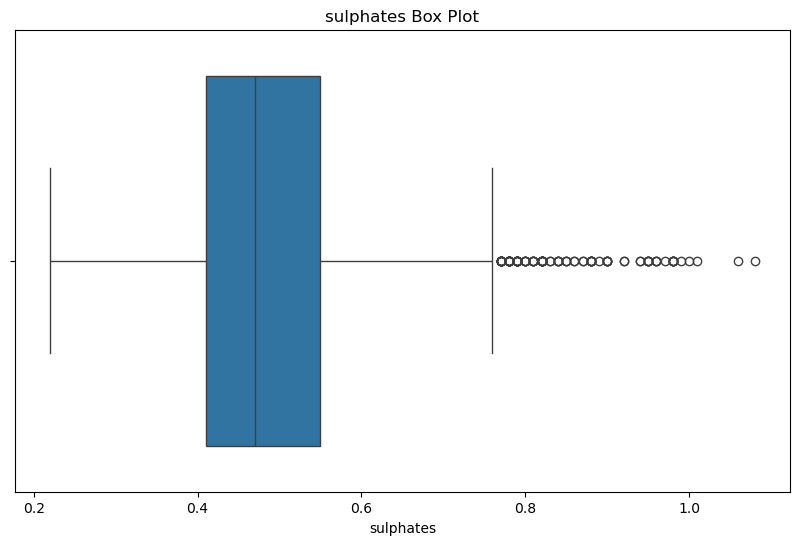

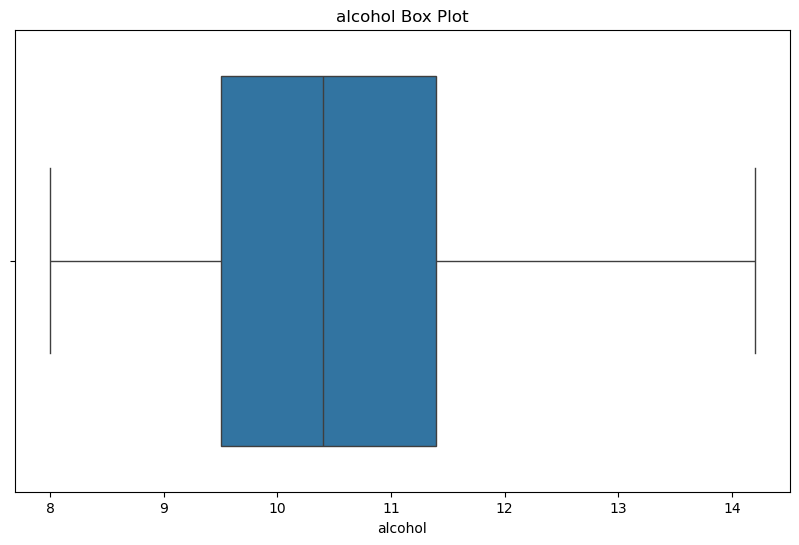

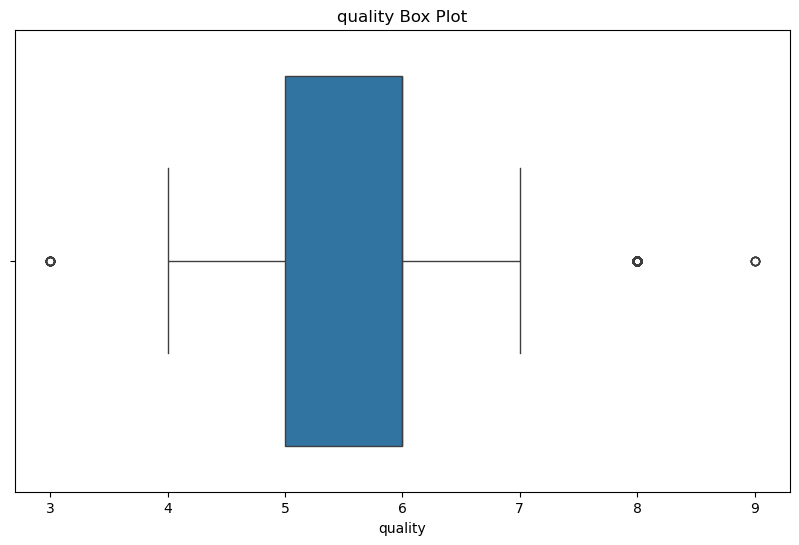

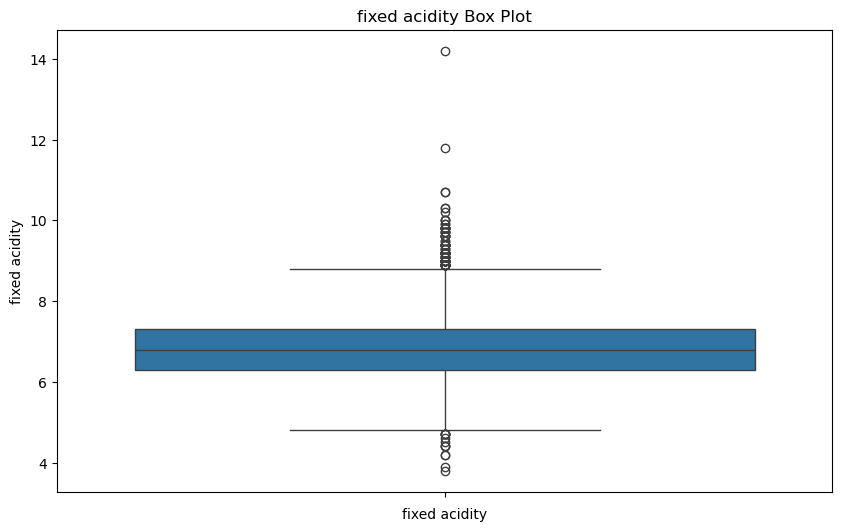

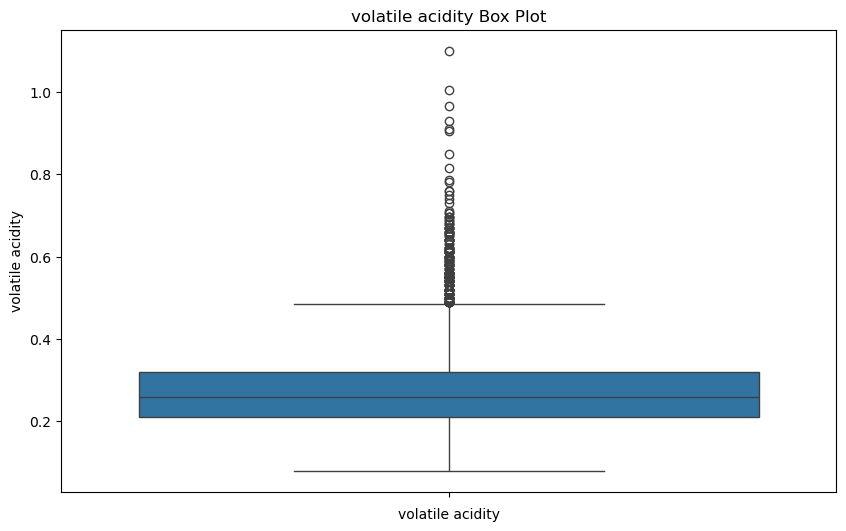

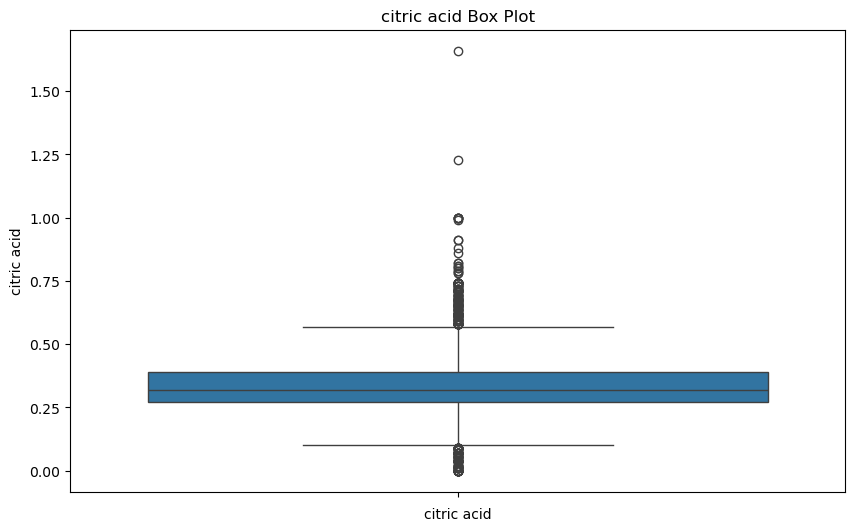

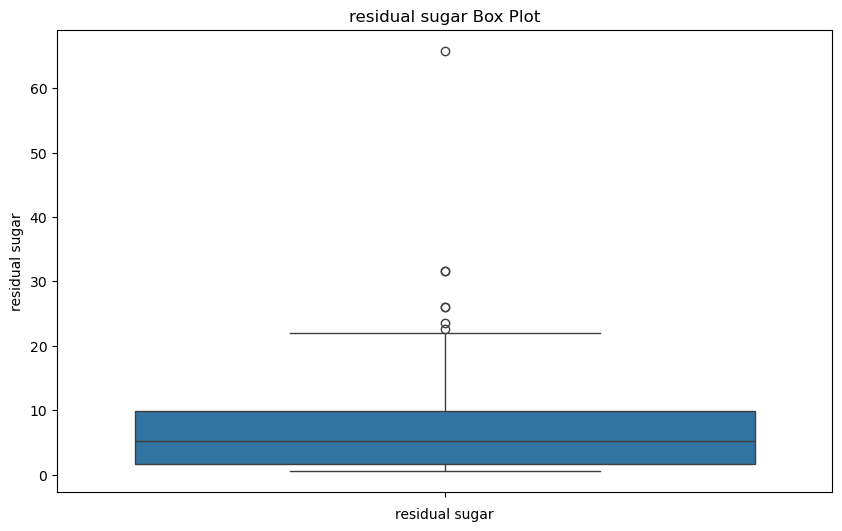

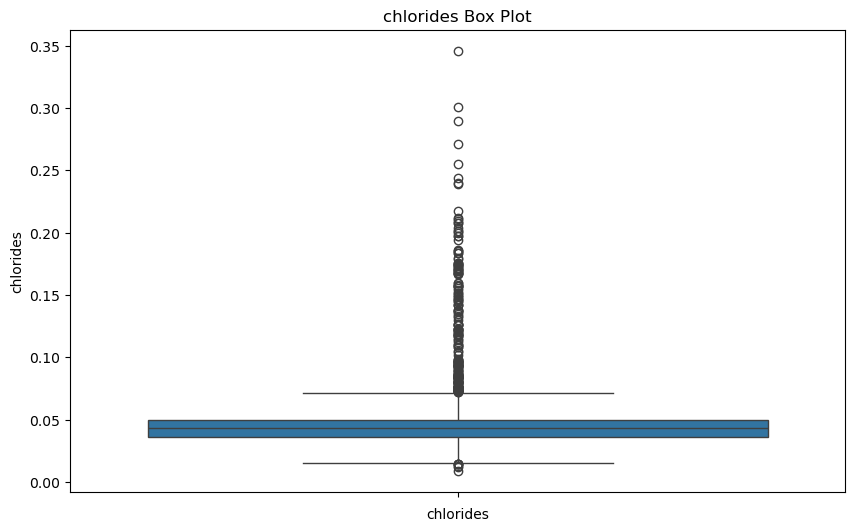

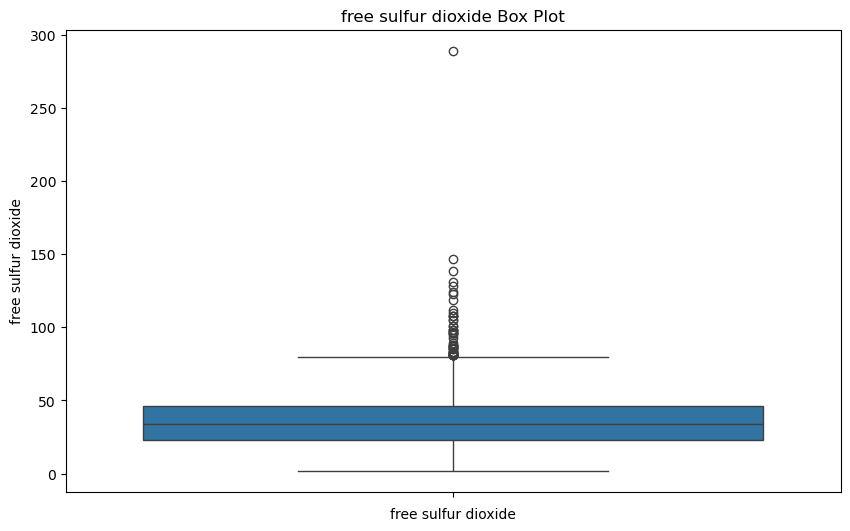

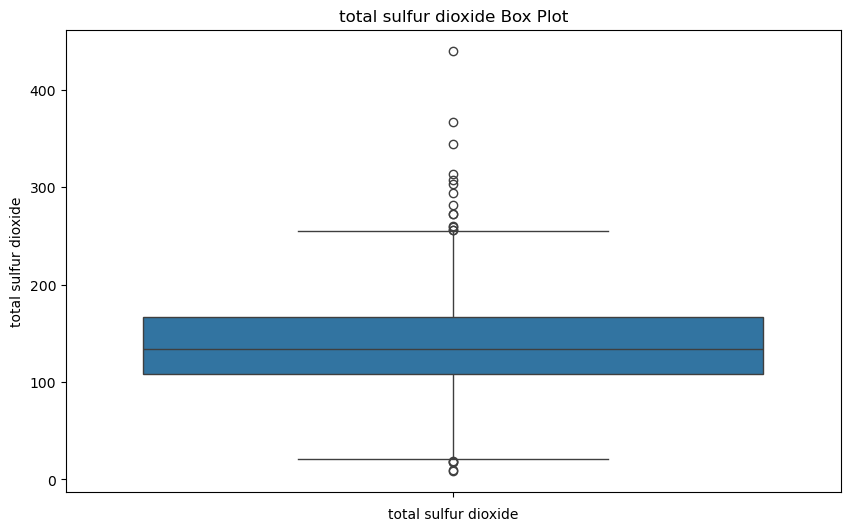

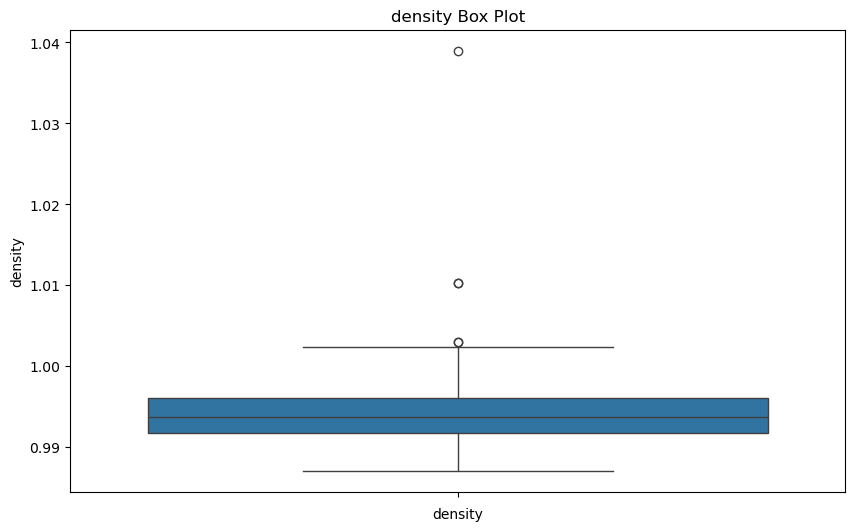

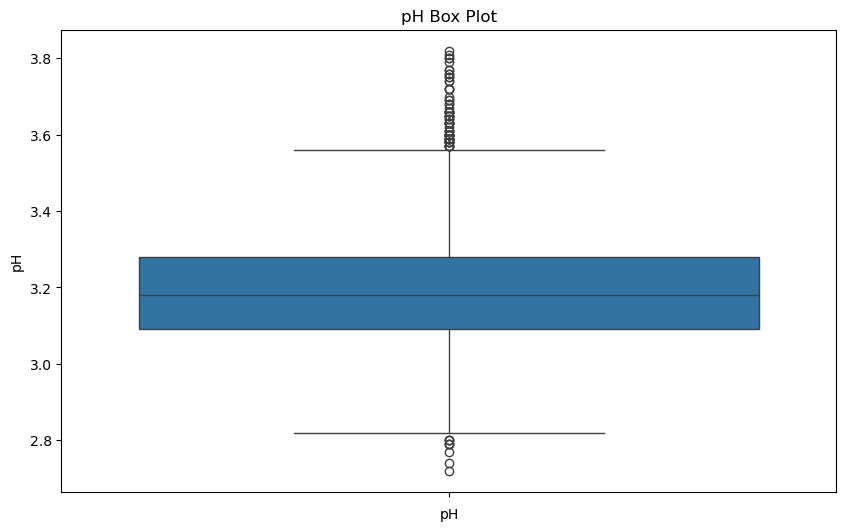

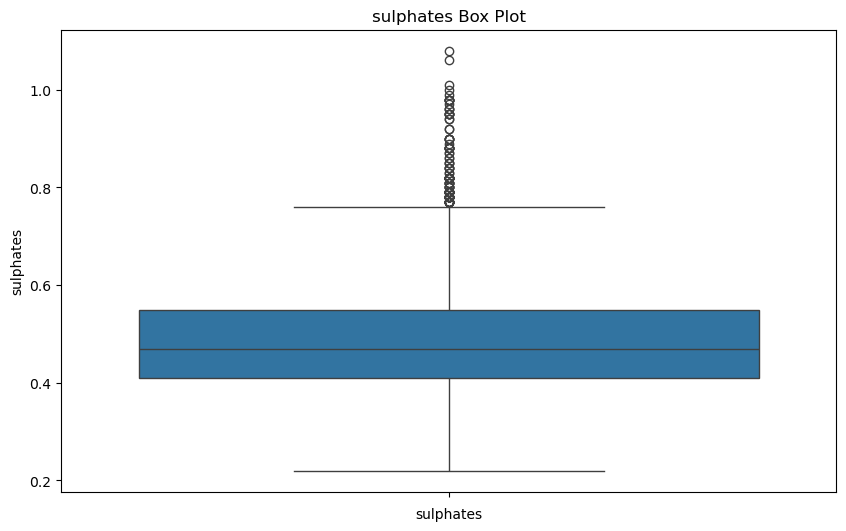

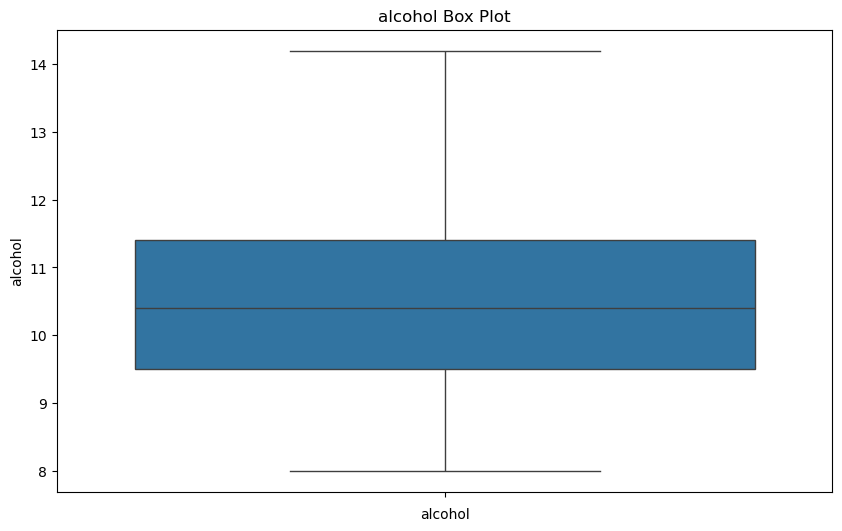

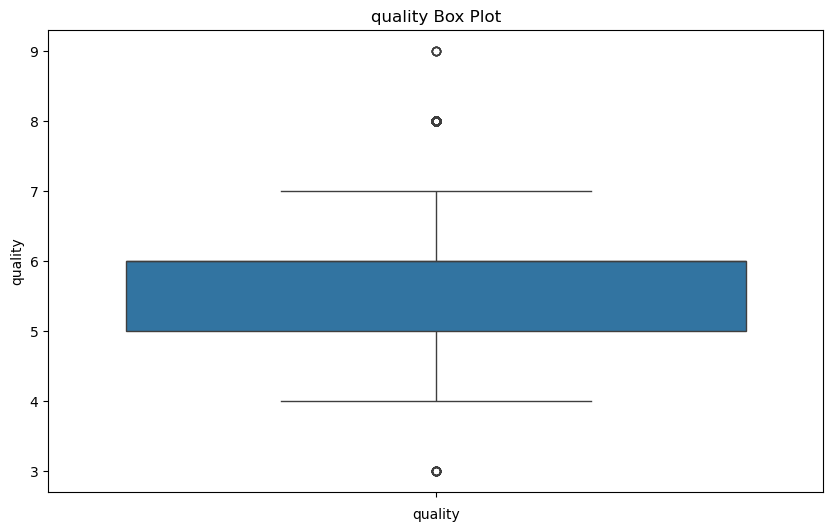

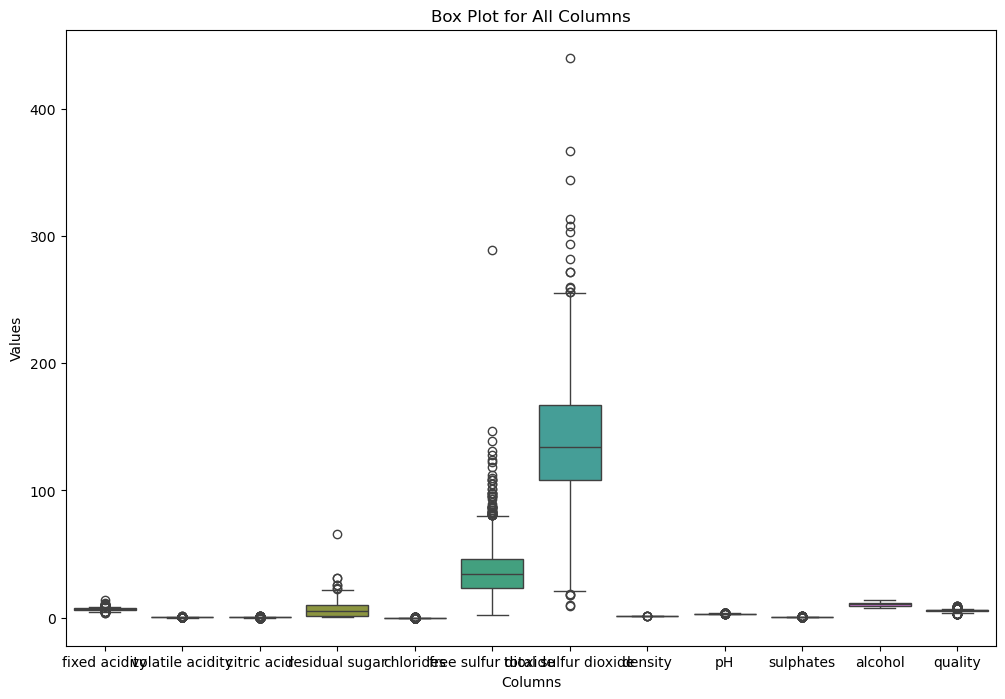

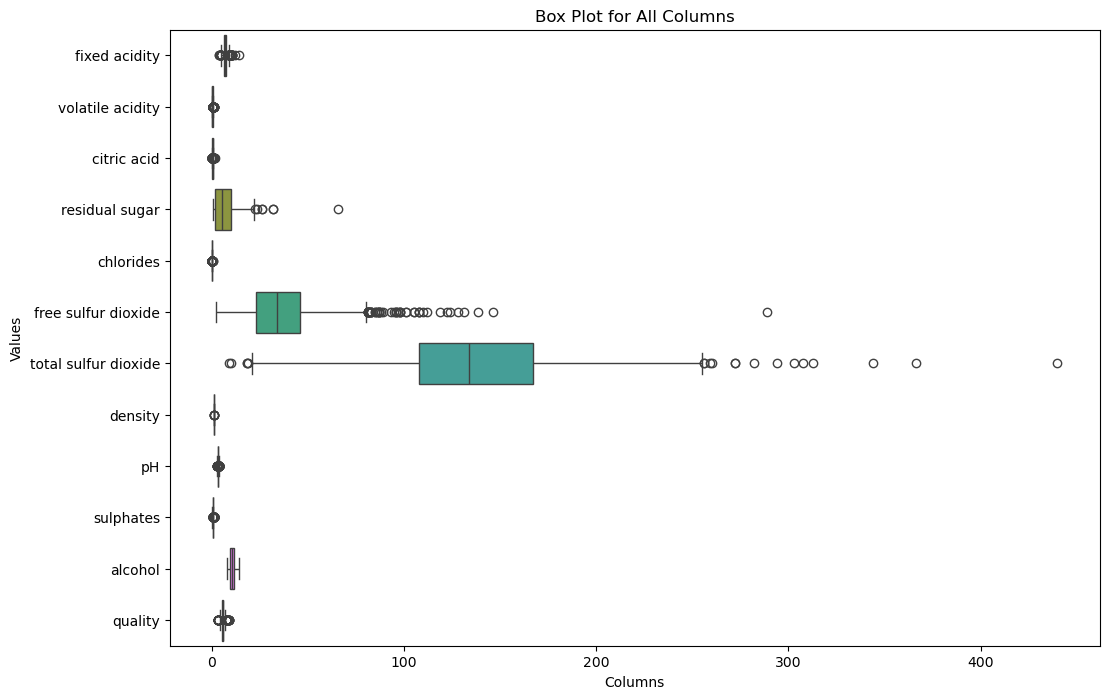

In [19]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(data, export_path=None):
    num_columns = len(data.columns)
    
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(x=column, data=data, bins=20, kde=True)
        plt.title(f"{column} Histogram")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        if export_path:
            plt.savefig(os.path.join(export_path, f"{column}_histogram.png"), dpi=300)
        plt.show()

def plot_histograms_with_hue(data, hue_column, export_path=None):
    num_columns = len(data.columns)
    
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(x=column, data=data, bins=20, kde=True, hue=hue_column, stat="probability")
        plt.title(f"{column} Histogram with {hue_column}")
        plt.xlabel(column)
        plt.ylabel("Probability")
        if export_path:
            plt.savefig(os.path.join(export_path, f"{column}_histogram_with_{hue_column}.png"), dpi=300)
        plt.show()

def plot_boxplots(data, export_path=None, vertical=True, combined=False):
    num_columns = len(data.columns)
    
    if combined:
        plt.figure(figsize=(12, 8))
        if vertical:
            sns.boxplot(data=data)
        else:
            sns.boxplot(data=data, orient="h")
        plt.title("Box Plot for All Columns")
        plt.xlabel("Columns")
        plt.ylabel("Values")
        if export_path:
            plt.savefig(os.path.join(export_path, "all_columns_boxplot.png"), dpi=300)
        plt.show()
    else:
        for column in data.columns:
            plt.figure(figsize=(10, 6))
            if vertical:
                sns.boxplot(x=data[column])
            else:
                sns.boxplot(y=data[column])
            plt.title(f"{column} Box Plot")
            plt.xlabel(column)
            if export_path:
                plt.savefig(os.path.join(export_path, f"{column}_boxplot.png"), dpi=300)
            plt.show()


plot_histograms(data=dtf, export_path="D:\My folder\ostad\module_17\wine")
plot_histograms_with_hue(data=dtf, hue_column="quality", export_path="D:\My folder\ostad\module_17\wine")
plot_boxplots(data=dtf, export_path="D:\My folder\ostad\module_17\wine")
plot_boxplots(data=dtf, export_path="D:\My folder\ostad\module_17\wine", vertical=False)
plot_boxplots(data=dtf, export_path="D:\My folder\ostad\module_17\wine", combined=True)
plot_boxplots(data=dtf, export_path="D:\My folder\ostad\module_17\wine", vertical=False, combined=True)



In [20]:
dtf = dtf[features+['quality']]
dtf.head()

fixed acidity  volatile acidity  citric acid  residual sugar    pH  \
0            7.0              0.27         0.36            20.7  3.00   
1            6.3              0.30         0.34             1.6  3.30   
2            8.1              0.28         0.40             6.9  3.26   
3            7.2              0.23         0.32             8.5  3.19   
4            7.2              0.23         0.32             8.5  3.19   

   sulphates  density  total sulfur dioxide  chlorides  alcohol  quality  
0       0.45   1.0010                 170.0      0.045      8.8        6  
1       0.49   0.9940                 132.0      0.049      9.5        6  
2       0.44   0.9951                  97.0      0.050     10.1        6  
3       0.40   0.9956                 186.0      0.058      9.9        6  
4       0.40   0.9956                 186.0      0.058      9.9        6

quality_binary
0    3838
1    1060
Name: count, dtype: int64


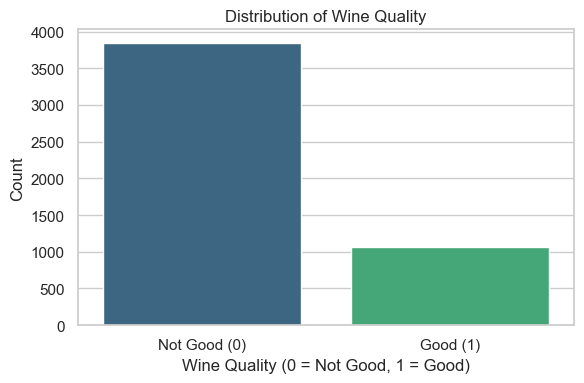

In [21]:
dtf['quality_binary'] = (dtf['quality'] >= 7).astype(int)

print(dtf['quality_binary'].value_counts())

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='quality_binary', data=dtf, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality (0 = Not Good, 1 = Good)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Good (0)', 'Good (1)'])
plt.tight_layout()
plt.show()


In [22]:
dtf.drop(columns=['quality'], inplace=True)

Partitioning

In [23]:
dtf_train, dtf_test = dtf_partitioning(dtf, y="quality_binary", test_size=0.3, shuffle=False)

X_train shape: (3428, 10) | X_test shape: (1470, 10)
y_train mean: 0.22 | y_test mean: 0.21
11 features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'pH', 'sulphates', 'density', 'total sulfur dioxide', 'chlorides', 'alcohol']


In [24]:
dtf_train.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar    pH  \
0            7.0              0.27         0.36            20.7  3.00   
1            6.3              0.30         0.34             1.6  3.30   
2            8.1              0.28         0.40             6.9  3.26   

   sulphates  density  total sulfur dioxide  chlorides  alcohol  \
0       0.45   1.0010                 170.0      0.045      8.8   
1       0.49   0.9940                 132.0      0.049      9.5   
2       0.44   0.9951                  97.0      0.050     10.1   

   quality_binary  
0               0  
1               0  
2               0

In [25]:
dtf_test.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar    pH  \
3428            6.4              0.32         0.27            4.90  3.36   
3429            7.1              0.18         0.39           14.50  3.35   
3430            7.1              0.17         0.40           14.55  3.34   

      sulphates  density  total sulfur dioxide  chlorides  alcohol  \
3428       0.71  0.99160                 122.0      0.034     12.5   
3429       0.78  0.99947                 156.0      0.051      9.1   
3430       0.78  0.99945                 156.0      0.047      9.1   

      quality_binary  
3428               0  
3429               0  
3430               0

Scaling

In [26]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [27]:
dtf_train, scaler = scaling(dtf_train, y="quality_binary", scalerX=scaler, task="classification")

In [28]:
dtf_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar        pH  \
0           0.28          0.205405     0.216867        0.308282  0.254545   
1           0.21          0.237838     0.204819        0.015337  0.527273   
2           0.39          0.216216     0.240964        0.096626  0.490909   
3           0.30          0.162162     0.192771        0.121166  0.427273   
4           0.30          0.162162     0.192771        0.121166  0.427273   

   sulphates   density  total sulfur dioxide  chlorides   alcohol  \
0   0.273810  0.267502              0.436155   0.098802  0.133333   
1   0.321429  0.132498              0.327116   0.110778  0.250000   
2   0.261905  0.153713              0.226686   0.113772  0.350000   
3   0.214286  0.163356              0.482066   0.137725  0.316667   
4   0.214286  0.163356              0.482066   0.137725  0.316667   

   quality_binary  
0               0  
1               0  
2               0  
3               0  
4               0

Shape: (3428, 11)
-----------------
fixed acidity --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
volatile acidity --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
citric acid --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
residual sugar --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
pH --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
sulphates --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
density --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
total sulfur dioxide --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
chlorides --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
alcohol --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
quality_binary --> Type:cat | Nas: 0(0%) | Categories: 2


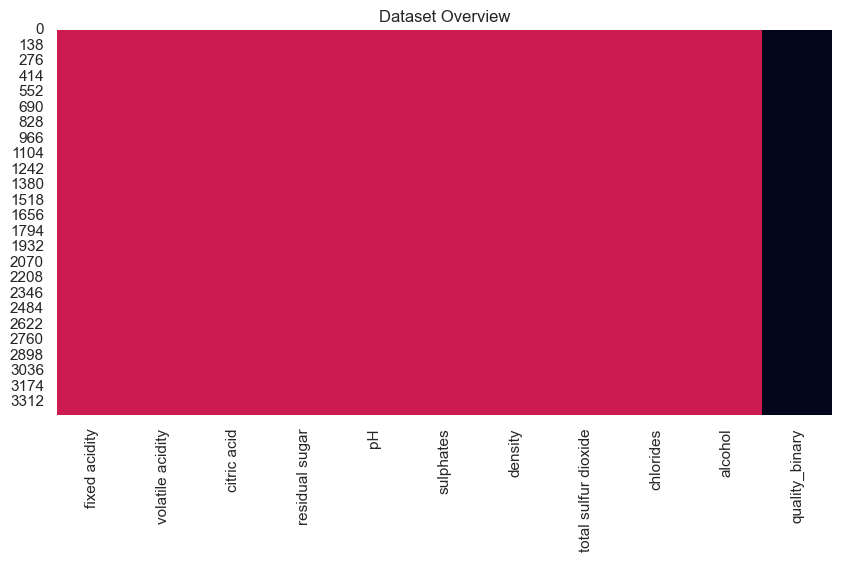

 Categerocial   Numerical/DateTime   NaN 


In [29]:
dtf_overview(dtf_train)

In [30]:
dtf_test = dtf_test[dtf_train.columns]
dtf_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar    pH  \
3428            6.4              0.32         0.27            4.90  3.36   
3429            7.1              0.18         0.39           14.50  3.35   
3430            7.1              0.17         0.40           14.55  3.34   
3431            7.1              0.18         0.39           15.25  3.34   
3432            7.8              0.29         0.29            3.15  3.24   

      sulphates  density  total sulfur dioxide  chlorides  alcohol  \
3428       0.71  0.99160                 122.0      0.034     12.5   
3429       0.78  0.99947                 156.0      0.051      9.1   
3430       0.78  0.99945                 156.0      0.047      9.1   
3431       0.77  0.99946                 158.0      0.047      9.1   
3432       0.35  0.99153                 117.0      0.044     11.5   

      quality_binary  
3428               0  
3429               0  
3430               0  
3431               0  
3432               0

In [31]:
## Scale
dtf_test, _ = scaling(dtf_test, y="quality_binary", scalerX=scaler, fitted=True)

Shape: (1470, 11)
-----------------
fixed acidity --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
volatile acidity --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
citric acid --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
residual sugar --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
pH --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
sulphates --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
density --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
total sulfur dioxide --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
chlorides --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
alcohol --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
quality_binary --> Type:cat | Nas: 0(0%) | Categories: 2


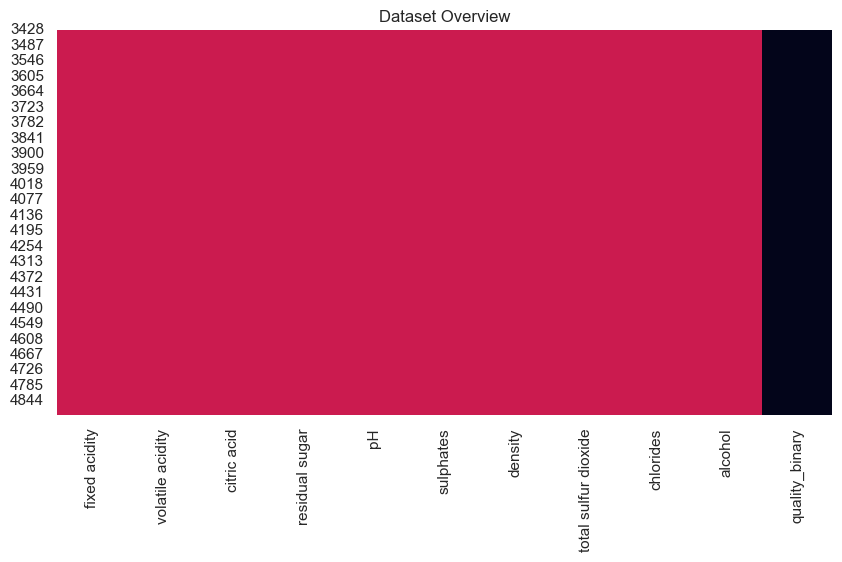

 Categerocial   Numerical/DateTime   NaN 


In [32]:
dtf_overview(dtf_test)

# Features Selection

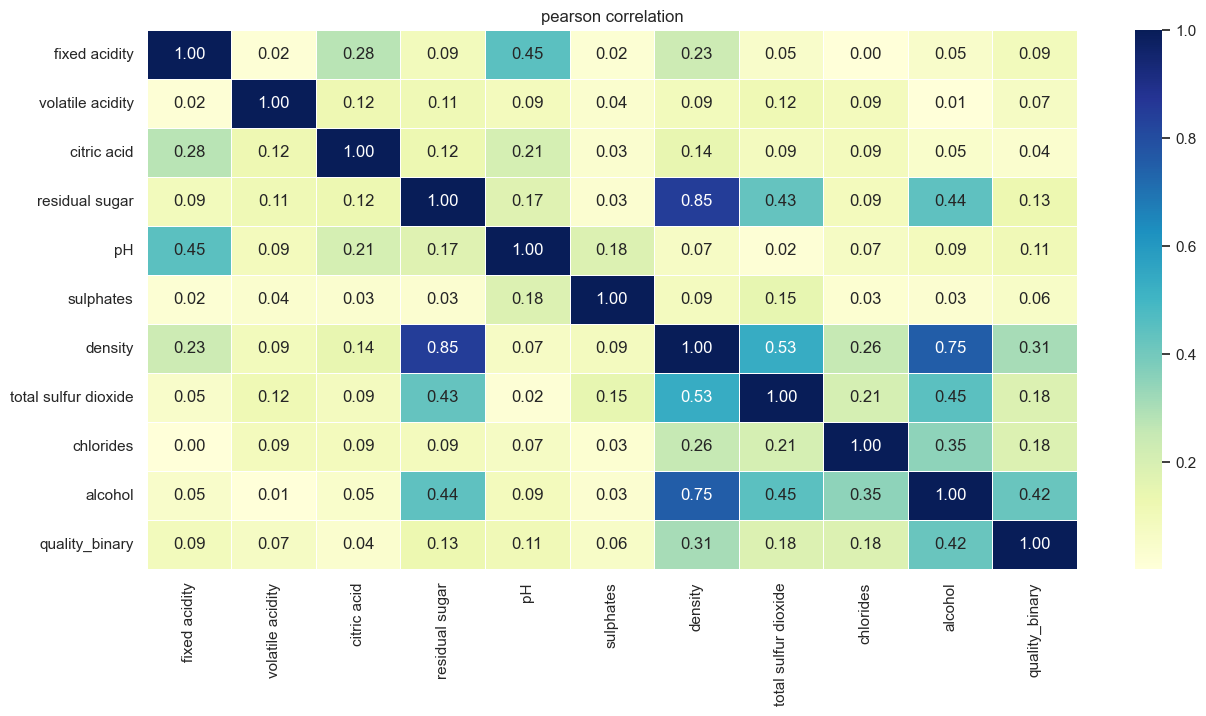

In [33]:
#--- correlation ---#
corr = corr_matrix(dtf_train, method="pearson", negative=False, annotation=True, figsize=(15,7))

residual sugar, density, chlorides, alcohol were selected by both methods (p_value + regularization) - making them likely important features.

volatile acidity was selected only by regularization.

total sulfur dioxide was selected only by p_value.

Others like fixed acidity, citric acid, pH, sulphates were not selected by any method — indicating low or no importance for classification in this case.

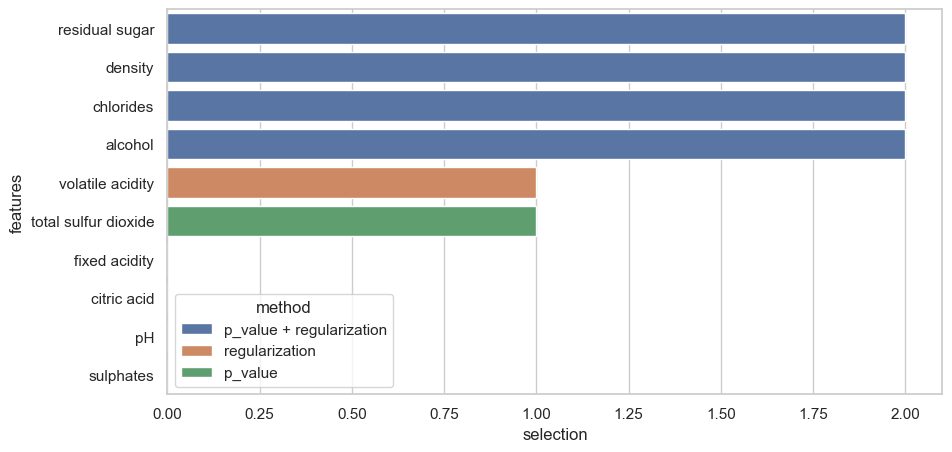

In [34]:
#--- p values ---#
dic_feat_sel = features_selection(dtf_train, y="quality_binary", task="classification", top=5, figsize=(10,5))

This graph visualizes feature importance derived from a Random Forest Classifier model trained to predict wine quality. 
# Alcohol (Highest Importance)

Confirms prior insights: Alcohol content is the strongest predictor of quality.

Higher alcohol → better quality (common in wine datasets).

# Density, chlorides & Volatile Acidity

Density: Often inversely related to alcohol; lower density → higher alcohol → better quality.

Volatile Acidity: High levels (e.g., vinegar-like flavors) degrade quality.

# Total Sulfur Dioxide & pH

Sulfur Dioxide: Preservative effects; optimal levels may improve quality.

pH: Affects stability and taste; extreme values harm quality.

# Less Important Features

Residual sugar, sulphates, fixed acidity, and citric acid have minimal impact.



Top 85% important features:
alcohol
density
chlorides
volatile acidity
total sulfur dioxide
pH
citric acid
residual sugar
sulphates


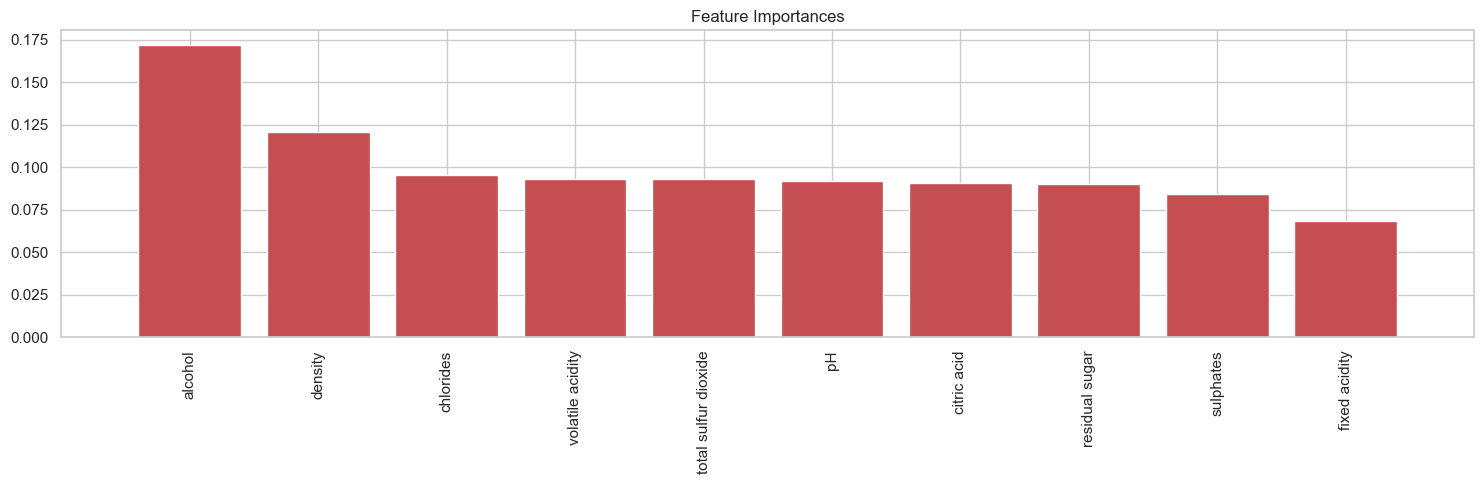

In [35]:
from sklearn import ensemble
import numpy as np

def features_importance(X, y, X_names, model, task, figsize):
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    cumulative_importance = np.cumsum(importances[indices])

    # Calculate the threshold for selecting top 85% features
    threshold_idx = np.argmax(cumulative_importance > 0.9)
    selected_indices = indices[:threshold_idx+1]
    
    # Print the names of the selected features
    selected_features = [X_names[i] for i in selected_indices]
    print("Top 85% important features:")
    for feature in selected_features:
        print(feature)
    
    # Plotting feature importance
    if task == "classification":
        import matplotlib.pyplot as plt
        plt.figure(figsize=figsize)
        plt.title("Feature Importances")
        plt.bar(range(X.shape[1]), importances[indices],
                color="r", align="center")
        plt.xticks(range(X.shape[1]), [X_names[i] for i in indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.tight_layout()
        plt.show()

# Usage
model = ensemble.RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
features_importance(X=dtf_test.drop("quality_binary",axis=1).values, y=dtf_test["quality_binary"].values, 
                    X_names=dtf_test.drop("quality_binary",axis=1).columns.tolist(), 
                    model=model, task="classification", figsize=(15,5))


In [36]:
# -> selection
#X_names = ['alcohol','density','volatile acidity','total sulfur dioxide','chlorides','residual sugar','citric acid','pH','sulphates','fixed acidity']
X_names = ['alcohol','density','volatile acidity','total sulfur dioxide','chlorides']


In [49]:
#PCA 
from sklearn.decomposition import PCA

# Set pca components
pca =  PCA(n_components=0.9)

# Model Design

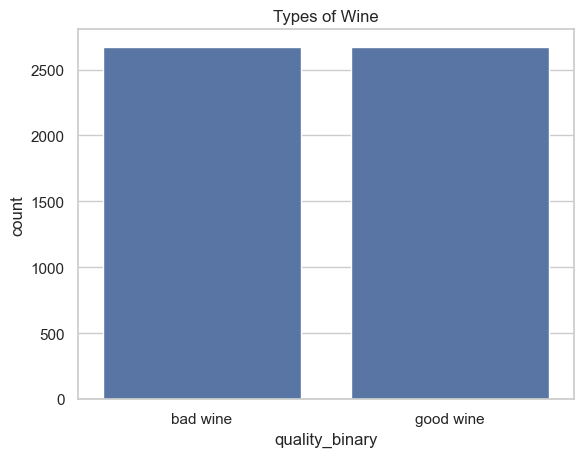

In [37]:
from imblearn.over_sampling import SMOTE

# Split features and target
y = dtf_train["quality_binary"]
X = dtf_train[X_names]

# Apply SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

sns.countplot(x=y_resampled)
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

# Put the resampled data into one DataFrame (if needed)
dtf_train = X_resampled.copy()
dtf_train["quality_binary"] = y_resampled

# Then scale it properly
dtf_train, scaler = scaling(dtf_train, "quality_binary", scalerX=None, task="classification")


In [38]:
dtf_test = dtf_test[dtf_train.columns]
## Scale
dtf_test, _ = scaling(dtf_test, y="quality_binary", scalerX=None)

In [39]:
X_train = dtf_train[X_names].values
y_train = dtf_train["quality_binary"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["quality_binary"].values

In [51]:
from sklearn.pipeline import make_pipeline
log_model=make_pipeline(scaler, pca, LogisticRegression())

In [52]:
#log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression', LogisticRegression())])

In [53]:
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy_log:.4f}")
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", report)

Accuracy: 0.7020
Confusion Matrix:
 [[823 343]
 [ 95 209]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1166
           1       0.38      0.69      0.49       304

    accuracy                           0.70      1470
   macro avg       0.64      0.70      0.64      1470
weighted avg       0.79      0.70      0.73      1470



In [56]:
from sklearn.ensemble import RandomForestClassifier
rndm_model = RandomForestClassifier()
rndm_model.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred_rndm =rndm_model.predict(X_test)
accuracy_rndm = accuracy_score(y_test, y_pred_rndm)
report = classification_report(y_test, y_pred_rndm)

print(f"Accuracy: {accuracy_rndm:.4f}")
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rndm))
print("\nClassification Report:\n", report)

Accuracy: 0.7871
Confusion Matrix:
 [[1086   80]
 [ 233   71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1166
           1       0.47      0.23      0.31       304

    accuracy                           0.79      1470
   macro avg       0.65      0.58      0.59      1470
weighted avg       0.75      0.79      0.76      1470



In [44]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.7429
Confusion Matrix:
 [[978 188]
 [190 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1166
           1       0.38      0.38      0.38       304

    accuracy                           0.74      1470
   macro avg       0.61      0.61      0.61      1470
weighted avg       0.74      0.74      0.74      1470



In [45]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.7673
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1166
           1       0.44      0.49      0.47       304

    accuracy                           0.77      1470
   macro avg       0.65      0.67      0.66      1470
weighted avg       0.78      0.77      0.77      1470



In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# KNN classifier with k=5
knn =KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.4f}")
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Accuracy: 0.7776
Confusion Matrix:
 [[986 180]
 [147 157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1166
           1       0.47      0.52      0.49       304

    accuracy                           0.78      1470
   macro avg       0.67      0.68      0.67      1470
weighted avg       0.79      0.78      0.78      1470



In [68]:
from sklearn.ensemble import GradientBoostingClassifier
#Create a pipeline using GB Classifier
gb_model = GradientBoostingClassifier()

# Fit the full pipeline to the data
gb_model.fit(X_train, y_train)

#Get the prediction
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy_gb:.4f}")
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Accuracy: 0.7830
Confusion Matrix:
 [[1018  148]
 [ 171  133]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1166
           1       0.47      0.44      0.45       304

    accuracy                           0.78      1470
   macro avg       0.66      0.66      0.66      1470
weighted avg       0.78      0.78      0.78      1470



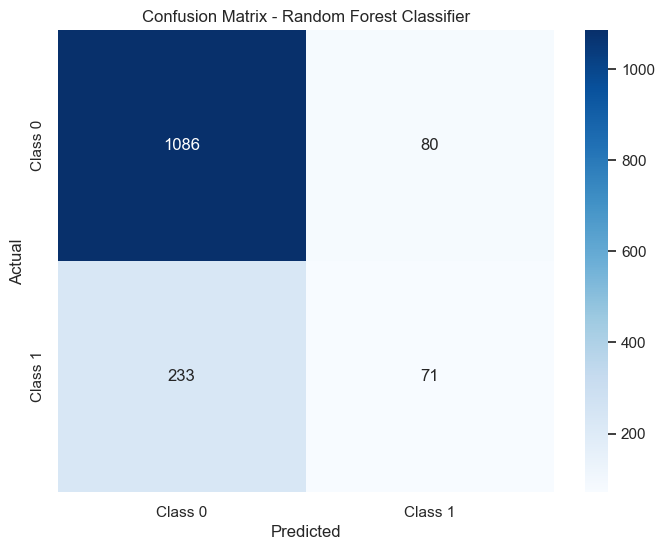

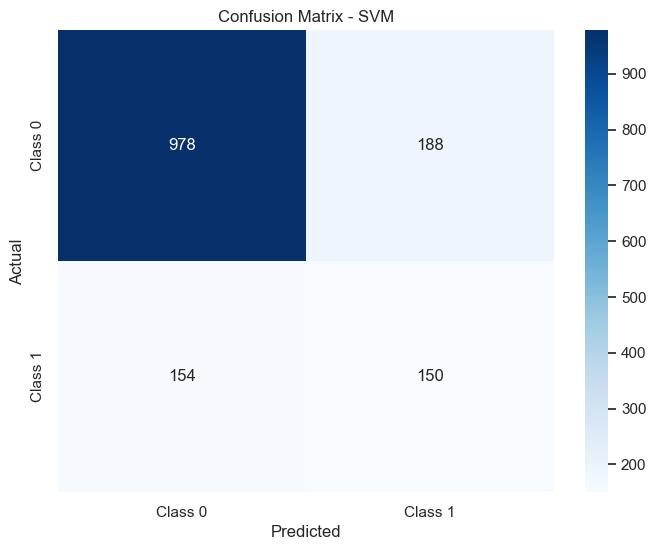

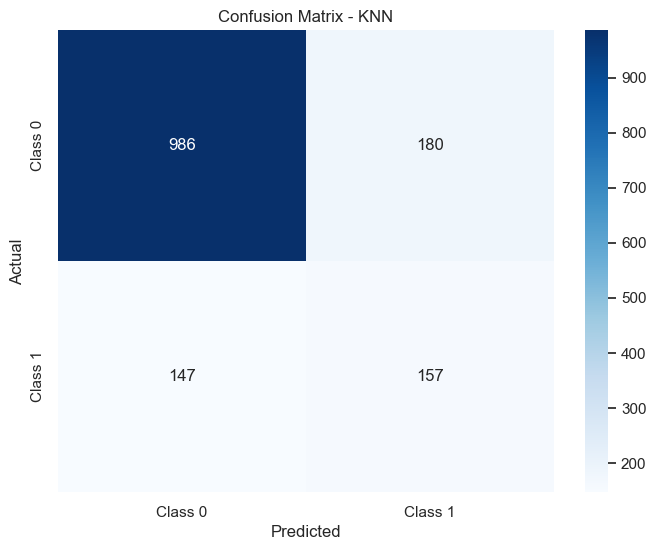

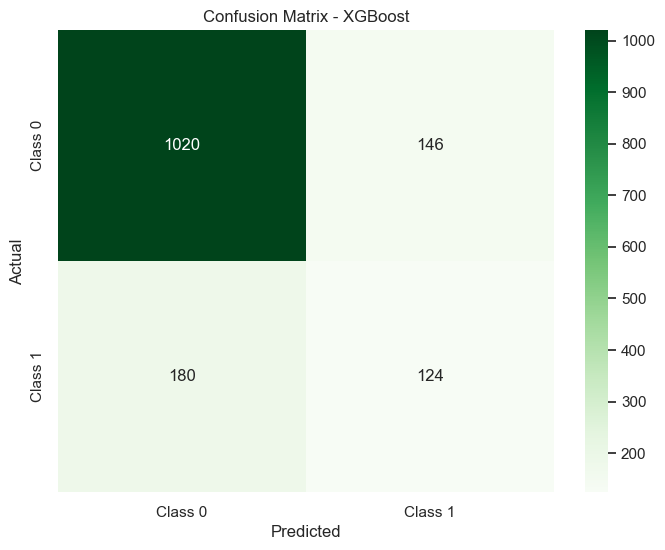

In [66]:
cm_rndm = confusion_matrix(y_test, y_pred_rndm)

cm_svm = confusion_matrix(y_test, y_pred_svm)

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Confusion Matrix for XGBoost
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rndm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Confusion Matrix Heatmap for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Confusion Matrix Heatmap for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


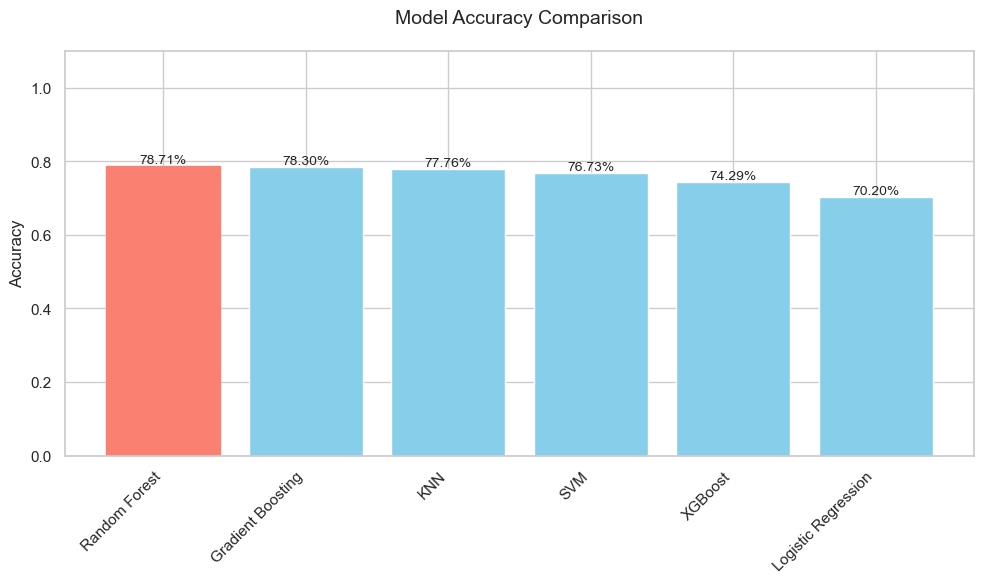

In [75]:

# Accuracy scores and model names
accuracy_scores = [accuracy_log, accuracy_rndm, accuracy_svm, accuracy_knn, accuracy_xgb,accuracy_gb]
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'XGBoost','Gradient Boosting']

# Combine and sort the data
model_data = list(zip(models, accuracy_scores))
model_data.sort(key=lambda x: x[1], reverse=True)  # Sort by accuracy in descending order
sorted_models, sorted_accuracies = zip(*model_data)

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_models, sorted_accuracies, color='skyblue')

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}',  # Format as percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Model Accuracy Comparison', fontsize=14, pad=20)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)  # Add some space at the top for the labels
plt.xticks(rotation=45, ha='right')  # Rotate model names for better readability

# Highlight the best performing model
bars[0].set_color('salmon')  # Color the top performer differently

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()